In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from scipy.stats import wasserstein_distance

In [2]:
data_num = 30000
ratio = 1.001 
A = np.exp(-data_num*(ratio-1)/16)
bins = np.arange(0.0,1.001,0.001)
hist = np.zeros(len(bins)-1)
for s in range(len(bins)-1):
    k1 = bins[s]
    k2 = bins[s+1]
    if(k2 <= 0.25):
        hist[s] = 1/ratio*special.erf(np.sqrt(ratio*data_num)/4)*(special.erf(np.sqrt(ratio*data_num)*(1/4 - k1)) - special.erf(np.sqrt(ratio*data_num)*(1/4 - k2)))
    elif(k2 <= 0.5):
        hist[s] = 1/ratio*special.erf(np.sqrt(ratio*data_num)/4)*(special.erf(np.sqrt(ratio*data_num)*(k2-1/4))-special.erf(np.sqrt(ratio*data_num)*(k1-1/4)))
    elif(k2 <= 0.75):
        hist[s] += A*special.erf(0.25*np.sqrt(data_num))*(special.erf(np.sqrt(data_num)*(3/4 - k1)) - special.erf(np.sqrt(data_num)*(3/4 - k2)))
    else:
        hist[s] += A*special.erf(0.25*np.sqrt(data_num))*(special.erf(np.sqrt(data_num)*(k2-3/4))-special.erf(np.sqrt(data_num)*(k1-3/4)))
hist = hist/np.sum(hist)*1000

In [3]:
folder_name_base = "../multimodal_sampling/output/EMC/"
sample_array = [300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000]
L_array = [10,30,100,300]
change = 4
iter = 10
Result_array_EMC_multimodal = np.zeros((len(L_array),change,iter))
Time_array_EMC_multimodal = np.zeros((len(L_array),change,iter))
for i in range(len(L_array)):
    L = L_array[i]
    for j in range(change):
        folder_name = folder_name_base + "burn_in_" + str(sample_array[3-i+j]) + "_L_" + str(L_array[i]) + "/"
        sample = sample_array[3-i+j]
        for k in range(iter):
            f = open(folder_name + "trial_" + str(k) + "/parameters.txt", "r")
            l = f.readlines()
            theta_EMC = np.zeros(sample)
            for m in range(sample):
                s = l[m + sample].split()
                theta_EMC[m] = s[0]
            hist_temp = np.histogram(theta_EMC, bins=bins, density=True)[0]
            Result_array_EMC_multimodal[i,j,k] += np.linalg.norm(hist - hist_temp)
            f = open(folder_name + "trial_" + str(k) + "/calculation_time.txt", "r")
            l = f.readlines()
            Time_array_EMC_multimodal[i,j,k] = float(l[0])

In [ ]:
folder_name_base = "../multimodal_sampling/output/SEMC/"
sample_array = [25000, 15000, 10000, 6000, 2000]
times = [1,3,10,30]
iter = 10
exchange_rate_array = ["0.100000", "0.300000", "0.500000", "0.700000", "0.900000"]
Result_array_SEMC_multimodal = np.zeros((len(sample_array),len(times),iter))
Time_array_SEMC_multimodal = np.zeros((len(sample_array),len(times),iter))
for i in range(len(times)):
    for j in range(len(exchange_rate_array)):
        sample = int(sample_array[j]*times[i])
        folder_name = folder_name_base + "burn_in_" + str(sample)
        exchange_rate = exchange_rate_array[j]
        for k in range(iter):
            f = open(folder_name + "_gamma_" + exchange_rate + "/trial_" + str(k) + "/parameters.txt", "r")
            l = f.readlines()
            theta_SEMC = np.zeros(sample)
            for m in range(sample):
                s = l[m + sample].split()
                theta_SEMC[m] = s[0]
            hist_temp = np.histogram(theta_SEMC, bins=bins, density=True)[0]
            Result_array_SEMC_multimodal[j,i,k] += np.linalg.norm(hist - hist_temp)
            f = open(folder_name + "_gamma_" + exchange_rate + "/trial_" + str(k) + "/calculation_time.txt", "r")
            l = f.readlines()
            Time_array_SEMC_multimodal[j,i,k] = float(l[0])

In [6]:
folder_name_base = "../multimodal_sampling/output/TMCMC/"
sample_array = [100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000, 3000000, 10000000]
steps_array = [1,10,100,1000]
change = 4
iter = 10
Result_array_TMCMC_multimodal = np.zeros((len(steps_array),change,iter))
Time_array_TMCMC_multimodal = np.zeros((len(steps_array),change,iter))
for i in range(len(steps_array)):
    steps = steps_array[i]
    for j in range(change):
        sample = sample_array[(3-i)*2 + j]
        folder_name = folder_name_base + "sample_" + str(sample) + "_nsteps_" + str(steps) + "/"
        for k in range(iter):
            f = open(folder_name + "trial_" + str(k) + "/parameters.txt", "r")
            l = f.readlines()
            theta_TMCMC = np.zeros(sample)
            for m in range(sample):
                s = l[m].split()
                theta_TMCMC[m] = s[0]
            hist_temp = np.histogram(theta_TMCMC, bins=bins, density=True)[0]
            Result_array_TMCMC_multimodal[i,j,k] += np.linalg.norm(hist - hist_temp)
            f = open(folder_name + "trial_" + str(k) + "/calculation_time.txt", "r")
            l = f.readlines()
            Time_array_TMCMC_multimodal[i,j,k] = float(l[0])

In [51]:
bins = np.arange(1.0,2.0001,0.005)
sample = 1000000
num_mu = 3
folder_name = "../spectral_deconvolution/output/baseline/"
f = open(folder_name + "inverse_temperatures.txt")
l = f.readlines()
L = int(l[0])
f = open(folder_name + "parameters.txt")
l = f.readlines()
mu_baseline = np.zeros((sample, num_mu))
for i in range(sample):
    s = l[i + sample].split()
    for j in range(num_mu):
        mu_baseline[i,j] = s[num_mu*j + 1]
    mu_baseline[i] = np.sort(mu_baseline[i])
baseline_hists = []
for i in range(num_mu):
    hist_temp = np.histogram(mu_baseline[:,i], bins=bins, density=True)[0]
    baseline_hists.append(hist_temp)

In [13]:
folder_name_base = "../spectral_deconvolution/output/EMC/"
sample_array = [300, 1000, 3000, 10000, 30000, 100000, 300000]
L_array = [10,30,100,300]
change = 4
iter = 10
Result_array_EMC_deconvolution = np.zeros((len(L_array),change,iter))
Time_array_EMC_deconvolution = np.zeros((len(L_array),change,iter))
for i in range(len(L_array)):
    L = L_array[i]
    for j in range(change):
        folder_name = folder_name_base + "burn_in_" + str(sample_array[3-i+j]) + "_L_" + str(L_array[i]) + "/"
        for k in range(iter):
            f = open(folder_name + "trial_" + str(k) + "/parameters.txt", "r")
            l = f.readlines()
            sample = sample_array[3-i+j]
            mu_EMC_deconvolution = np.zeros((sample, num_mu))
            for m in range(sample):
                s = l[m + sample].split()
                for n in range(num_mu):
                    mu_EMC_deconvolution[m,n] = s[num_mu*n + 1]
                mu_EMC_deconvolution[m] = np.sort(mu_EMC_deconvolution[m])
            Result_array_EMC_deconvolution[i,j,k] = 0
            for n in range(num_mu):
                hist_temp = np.histogram(mu_EMC_deconvolution[:,n], bins=bins, density=True)[0]
                Result_array_EMC_deconvolution[i,j,k] += np.linalg.norm(baseline_hists[n] - hist_temp)
            f = open(folder_name + "trial_" + str(k) + "/calculation_time.txt", "r")
            l = f.readlines()
            Time_array_EMC_deconvolution[i,j,k] = float(l[0])

In [14]:
folder_name_base = "../spectral_deconvolution/output/SEMC/"
sample_array = [25000, 15000, 10000, 6000, 2000]
times = [1,3,10,30]
iter = 10
exchange_rate_array = ["0.100000", "0.300000", "0.500000", "0.700000", "0.900000"]
Result_array_SEMC_deconvolution = np.zeros((len(sample_array),len(times),iter))
Time_array_SEMC_deconvolution = np.zeros((len(sample_array),len(times),iter))
for i in range(len(times)):
    for j in range(len(exchange_rate_array)):
        sample = int(sample_array[j]*times[i])
        folder_name = folder_name_base + "burn_in_" + str(sample)
        exchange_rate = exchange_rate_array[j]
        for k in range(iter):
            f = open(folder_name + "_gamma_" + exchange_rate + "/trial_" + str(k) + "/parameters.txt", "r")
            l = f.readlines()
            mu_baseline = np.zeros((sample, num_mu))
            for m in range(sample):
                s = l[m + sample].split()
                for n in range(num_mu):
                    mu_baseline[m,n] = s[num_mu*n + 1]
                mu_baseline[m] = np.sort(mu_baseline[m])
            Result_array_SEMC_deconvolution[j,i,k] = 0
            for n in range(num_mu):
                hist_temp = np.histogram(mu_baseline[:,n], bins=bins, density=True)[0]
                Result_array_SEMC_deconvolution[j,i,k] += np.linalg.norm(baseline_hists[n] - hist_temp)
            f = open(folder_name + "_gamma_" + exchange_rate + "/trial_" + str(k) + "/calculation_time.txt", "r")
            l = f.readlines()
            Time_array_SEMC_deconvolution[j,i,k] = float(l[0])

In [19]:
folder_name_base = "../spectral_deconvolution/output/TMCMC/"
sample_array = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000, 3000000]
steps_array = [1,10,100,1000]
change = 4
iter = 10
Result_array_TMCMC_deconvolution = np.zeros((len(steps_array),change,iter))
Time_array_TMCMC_deconvolution = np.zeros((len(steps_array),change,iter))
for i in range(len(steps_array)):
    steps = steps_array[i]
    for j in range(change):
        sample = sample_array[(4-i)*2 + j]
        folder_name = folder_name_base + "sample_" + str(sample) + "_nsteps_" + str(steps) + "/"
        for k in range(iter):
            f = open(folder_name + "trial_" + str(k) + "/parameters.txt", "r")
            l = f.readlines()
            mu_TMCMC_deconvolution = np.zeros((sample, num_mu))
            for m in range(sample):
                s = l[m].split()
                for n in range(num_mu):
                    mu_TMCMC_deconvolution[m,n] = s[num_mu*n + 1]
                mu_TMCMC_deconvolution[m] = np.sort(mu_TMCMC_deconvolution[m])
            Result_array_TMCMC_deconvolution[i,j,k] = 0
            for n in range(num_mu):
                hist_temp = np.histogram(mu_TMCMC_deconvolution[:,n], bins=bins, density=True)[0]
                Result_array_TMCMC_deconvolution[i,j,k] += np.linalg.norm(baseline_hists[n] - hist_temp)
            f = open(folder_name + "trial_" + str(k) + "/calculation_time.txt", "r")
            l = f.readlines()
            Time_array_TMCMC_deconvolution[i,j,k] = float(l[0])

In [61]:
bins = np.arange(1.0,2.0001,0.005)
sample = 1000000
num_mu = 4
folder_name = "../spectral_deconvolution_K_4/output/baseline/"
f = open(folder_name + "inverse_temperatures.txt")
l = f.readlines()
L = int(l[0])
f = open(folder_name + "parameters.txt")
l = f.readlines()
mu_baseline = np.zeros((sample, num_mu))
for i in range(sample):
    s = l[i + sample].split()
    for j in range(num_mu):
        mu_baseline[i,j] = s[3*j + 1]
    mu_baseline[i] = np.sort(mu_baseline[i])
baseline_hists = []
for i in range(num_mu):
    hist_temp = np.histogram(mu_baseline[:,i], bins=bins, density=True)[0]
    baseline_hists.append(hist_temp)

In [21]:
folder_name_base = "../spectral_deconvolution_K_4/output/EMC/"
sample_array = [300, 1000, 3000, 10000, 30000, 100000, 300000]
L_array = [10,30,100,300]
change = 4
iter = 10
Result_array_EMC_deconvolution_K_4 = np.zeros((len(L_array),change,iter))
Time_array_EMC_deconvolution_K_4 = np.zeros((len(L_array),change,iter))
for i in range(len(L_array)):
    L = L_array[i]
    for j in range(change):
        folder_name = folder_name_base + "burn_in_" + str(sample_array[3-i+j]) + "_L_" + str(L_array[i]) + "/"
        for k in range(iter):
            f = open(folder_name + "trial_" + str(k) + "/parameters.txt", "r")
            l = f.readlines()
            sample = sample_array[3-i+j]
            mu_EMC_deconvolution = np.zeros((sample, num_mu))
            for m in range(sample):
                s = l[m + sample].split()
                for n in range(num_mu):
                    mu_EMC_deconvolution[m,n] = s[3*n + 1]
                mu_EMC_deconvolution[m] = np.sort(mu_EMC_deconvolution[m])
            Result_array_EMC_deconvolution_K_4[i,j,k] = 0
            for n in range(num_mu):
                hist_temp = np.histogram(mu_EMC_deconvolution[:,n], bins=bins, density=True)[0]
                Result_array_EMC_deconvolution_K_4[i,j,k] += np.linalg.norm(baseline_hists[n] - hist_temp)
            f = open(folder_name + "trial_" + str(k) + "/calculation_time.txt", "r")
            l = f.readlines()
            Time_array_EMC_deconvolution_K_4[i,j,k] = float(l[0])

In [22]:
folder_name_base = "../spectral_deconvolution_K_4/output/SEMC/"
sample_array = [25000, 15000, 10000, 6000, 2000]
times = [1,3,10,30]
iter = 10
exchange_rate_array = ["0.100000", "0.300000", "0.500000", "0.700000", "0.900000"]
Result_array_SEMC_deconvolution_K_4 = np.zeros((len(sample_array),len(times),iter))
Time_array_SEMC_deconvolution_K_4 = np.zeros((len(sample_array),len(times),iter))
for i in range(len(times)):
    for j in range(len(exchange_rate_array)):
        sample = int(sample_array[j]*times[i])
        folder_name = folder_name_base + "burn_in_" + str(sample)
        exchange_rate = exchange_rate_array[j]
        for k in range(iter):
            f = open(folder_name + "_gamma_" + exchange_rate + "/trial_" + str(k) + "/parameters.txt", "r")
            l = f.readlines()
            mu_baseline = np.zeros((sample, num_mu))
            for m in range(sample):
                s = l[m + sample].split()
                for n in range(num_mu):
                    mu_baseline[m,n] = s[3*n + 1]
                mu_baseline[m] = np.sort(mu_baseline[m])
            Result_array_SEMC_deconvolution_K_4[j,i,k] = 0
            for n in range(num_mu):
                hist_temp = np.histogram(mu_baseline[:,n], bins=bins, density=True)[0]
                Result_array_SEMC_deconvolution_K_4[j,i,k] += np.linalg.norm(baseline_hists[n] - hist_temp)
            f = open(folder_name + "_gamma_" + exchange_rate + "/trial_" + str(k) + "/calculation_time.txt", "r")
            l = f.readlines()
            Time_array_SEMC_deconvolution_K_4[j,i,k] = float(l[0])

In [23]:
folder_name_base = "../spectral_deconvolution_K_4/output/TMCMC/"
sample_array = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000, 3000000]
steps_array = [1,10,100,1000]
change = 4
iter = 10
Result_array_TMCMC_deconvolution_K_4 = np.zeros((len(steps_array),change,iter))
Time_array_TMCMC_deconvolution_K_4 = np.zeros((len(steps_array),change,iter))
for i in range(len(steps_array)):
    steps = steps_array[i]
    for j in range(change):
        sample = sample_array[(4-i)*2 + j]
        folder_name = folder_name_base + "sample_" + str(sample) + "_nsteps_" + str(steps) + "/"
        for k in range(iter):
            f = open(folder_name + "trial_" + str(k) + "/parameters.txt", "r")
            l = f.readlines()
            mu_TMCMC_deconvolution_K_4 = np.zeros((sample, num_mu))
            for m in range(sample):
                s = l[m].split()
                for n in range(num_mu):
                    mu_TMCMC_deconvolution_K_4[m,n] = s[3*n + 1]
                mu_TMCMC_deconvolution_K_4[m] = np.sort(mu_TMCMC_deconvolution_K_4[m])
            Result_array_TMCMC_deconvolution_K_4[i,j,k] = 0
            for n in range(num_mu):
                hist_temp = np.histogram(mu_TMCMC_deconvolution_K_4[:,n], bins=bins, density=True)[0]
                Result_array_TMCMC_deconvolution_K_4[i,j,k] += np.linalg.norm(baseline_hists[n] - hist_temp)
            f = open(folder_name + "trial_" + str(k) + "/calculation_time.txt", "r")
            l = f.readlines()
            Time_array_TMCMC_deconvolution_K_4[i,j,k] = float(l[0])

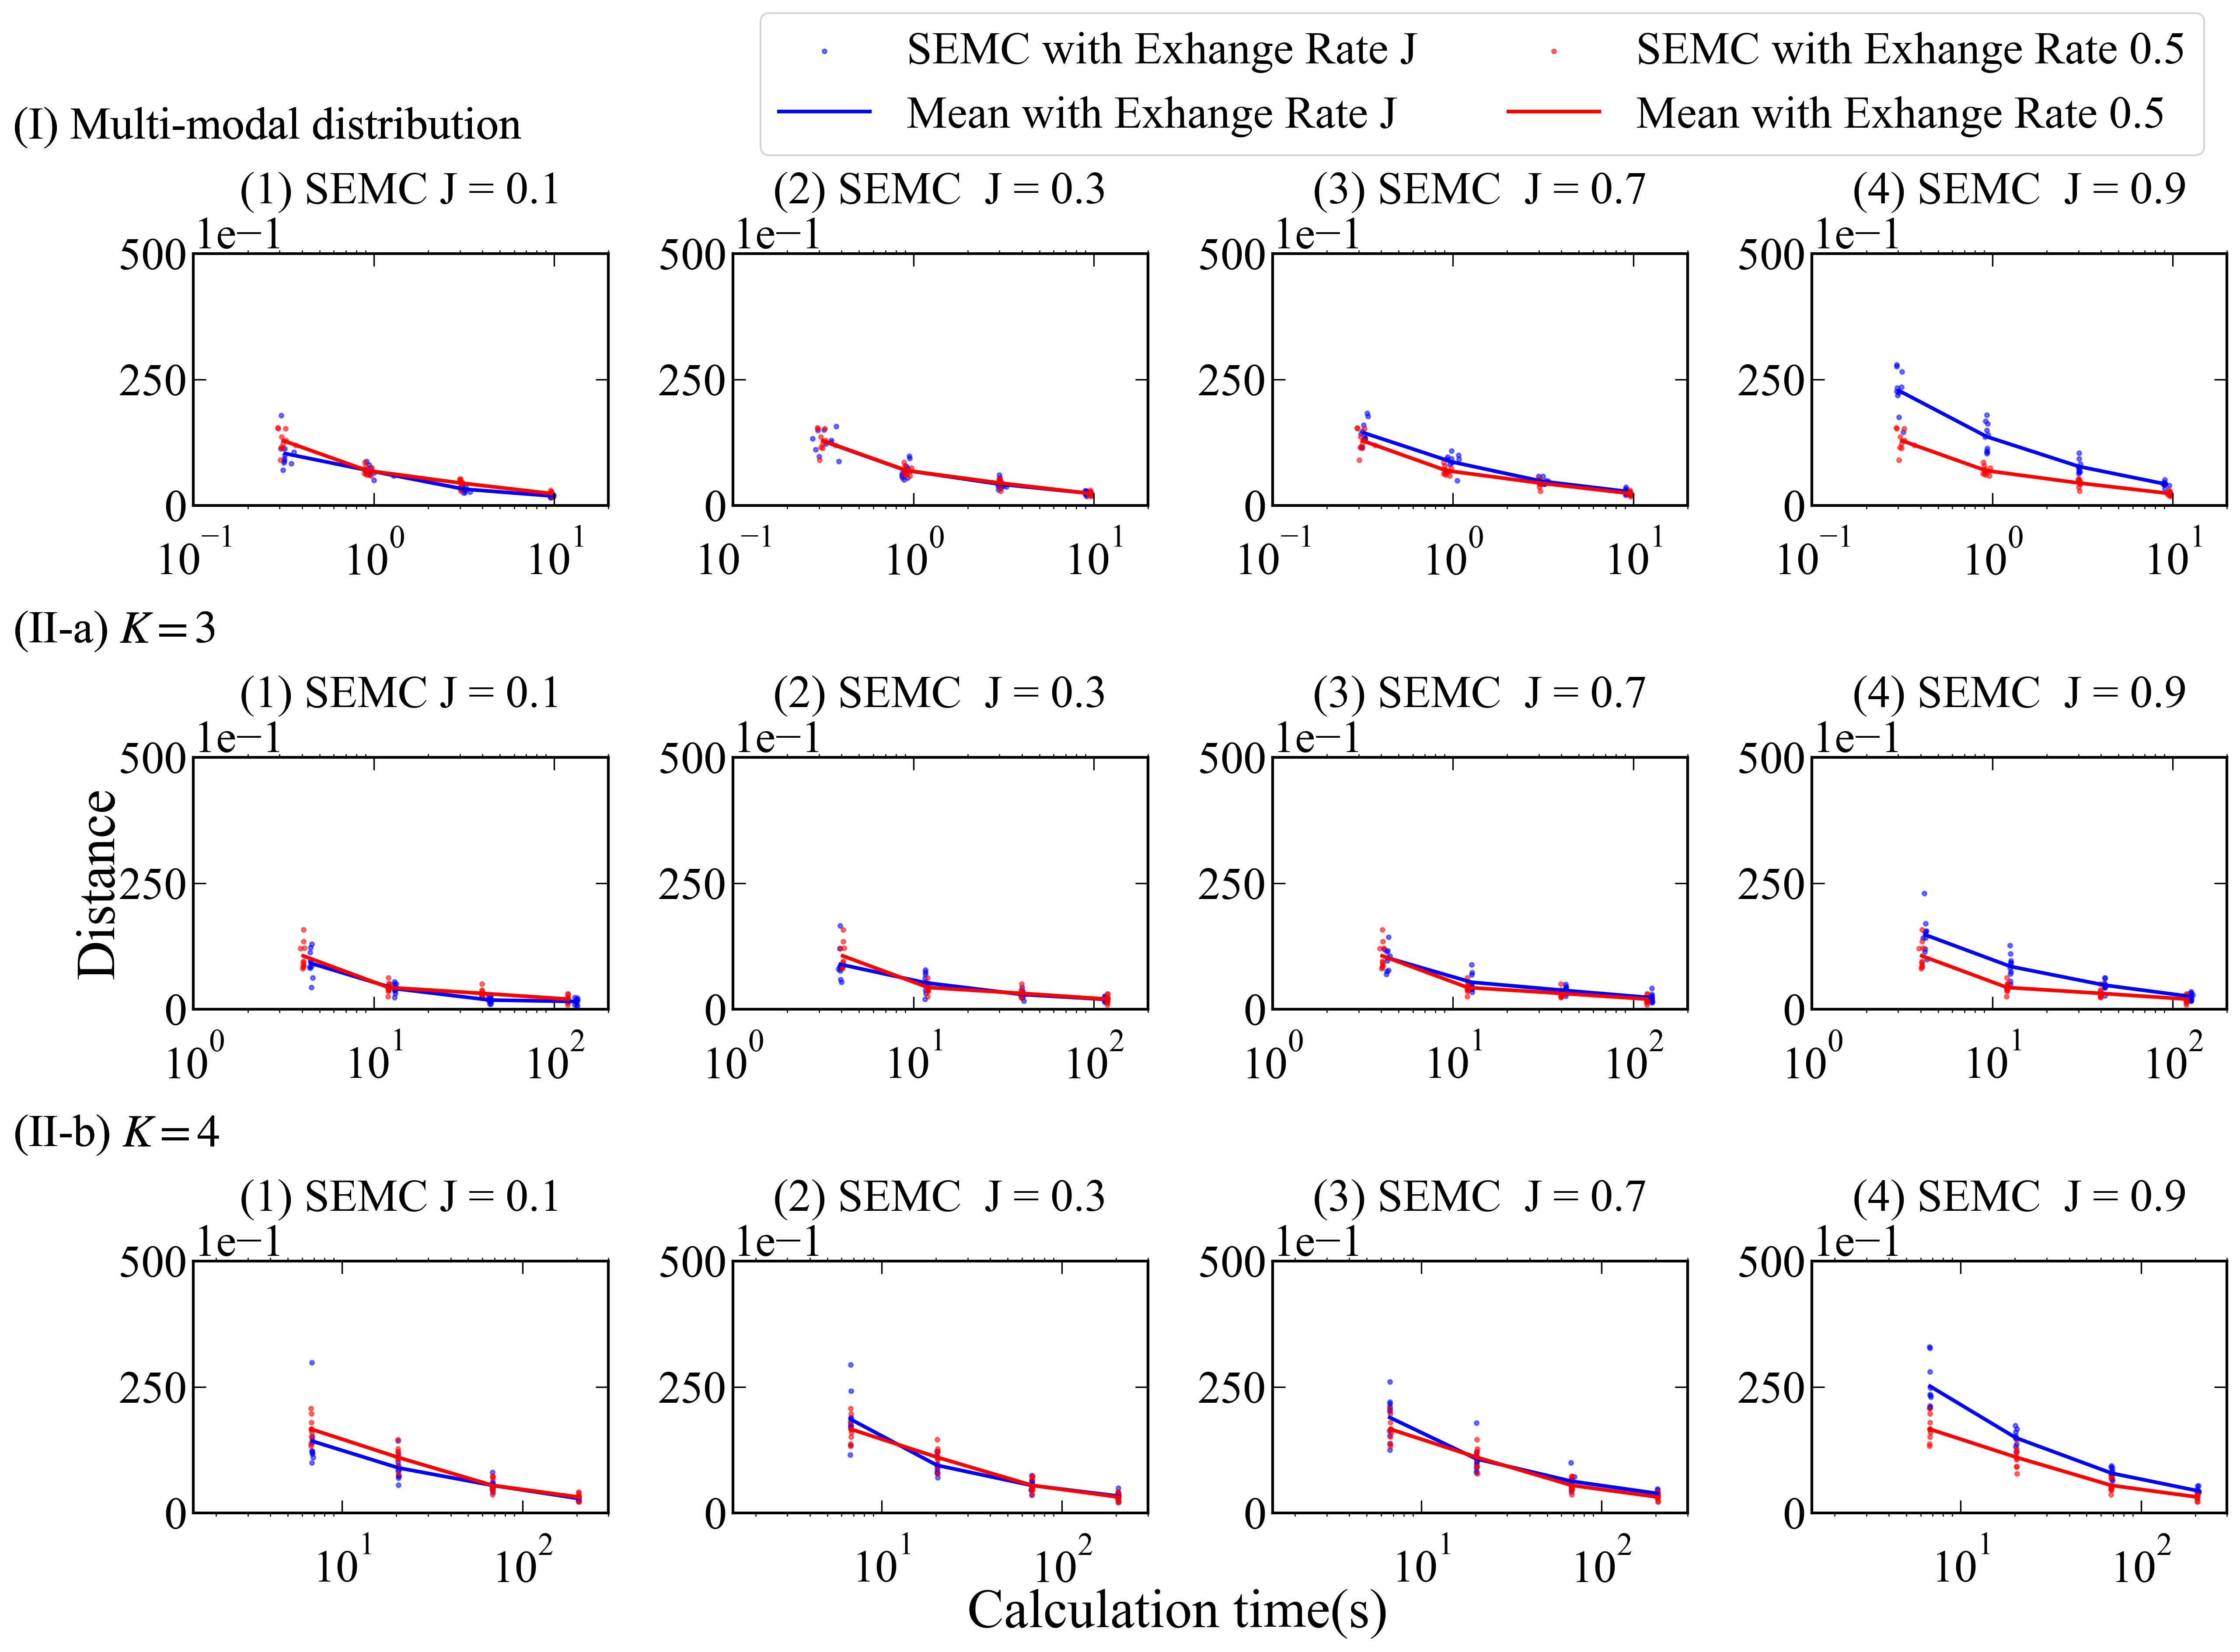

In [27]:
fig, axs = plt.subplots(3, 4, dpi=300, figsize=(20,12))
spines = 1.5
plt.rcParams['figure.subplot.bottom'] = 0.1
plt.rcParams['figure.subplot.top'] = 0.9
plt.rcParams['figure.subplot.right'] = 0.9
plt.rcParams['figure.subplot.left'] = 0.125
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 25
sample = 10000
Title_name = ["(I) Multi-modal distribution", "(II-a) $K=3$","(II-b) $K=4$"]
# Result_array_EMC_array = [Result_array_EMC_multimodal, Result_array_EMC_deconvolution, Result_array_EMC_deconvolution_K_4]
Result_array_SEMC_array = [Result_array_SEMC_multimodal, Result_array_SEMC_deconvolution, Result_array_SEMC_deconvolution_K_4]
# Time_array_EMC_array = [Time_array_EMC_multimodal, Time_array_EMC_deconvolution, Time_array_EMC_deconvolution_K_4]
Time_array_SEMC_array = [Time_array_SEMC_multimodal, Time_array_SEMC_deconvolution, Time_array_SEMC_deconvolution_K_4]
xmin_array = [0.1,1,1.5]
xmax_array = [2e1, 2e2, 3e2]
ymin = 0
ymax_array = [50, 50, 50]
text = ["(1) SEMC J = 0.1","(2) SEMC  J = 0.3","(3) SEMC  J = 0.7","(4) SEMC  J = 0.9"]
for iter in range(len(axs)):
    # Result_array_EMC = Result_array_EMC_array[iter]
    Result_array_SEMC = Result_array_SEMC_array[iter]
    # Time_array_EMC = Time_array_EMC_array[iter]
    Time_array_SEMC = Time_array_SEMC_array[iter]
    ymax = ymax_array[iter]
    xmin = xmin_array[iter]
    xmax = xmax_array[iter]
    for i, ax in enumerate(axs[iter]):
        ax.ticklabel_format(style="sci", axis="y", scilimits=(-1,-1))
        ax.spines["top"].set_linewidth(spines)
        ax.spines["left"].set_linewidth(spines)
        ax.spines["bottom"].set_linewidth(spines)
        ax.spines["right"].set_linewidth(spines)
        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(direction = "in", length = 7)
        ax.set_xscale("log")
        ax.set_ylim([ymin,ymax])
        ax.set_xlim([xmin,xmax])
        if i < 2:
            x = Time_array_SEMC[i]
            y = Result_array_SEMC[i]
        else:
            x = Time_array_SEMC[i+1]
            y = Result_array_SEMC[i+1]
        ax.text(np.exp((np.log(xmin) + np.log(xmax))/2), ymax*1.2, text[i], ha='center')
        ax.scatter(x,y,s=5,color = "blue",alpha = 0.5,label = "SEMC with Exhange Rate J")
        ax.plot(np.mean(x,axis = 1),np.mean(y,axis = 1),color = "blue",linewidth = 2, label = "Mean with Exhange Rate J")
        x = Time_array_SEMC[2]
        y = Result_array_SEMC[2]
        ax.scatter(x,y,s=5,color = "red",alpha = 0.5,label = "SEMC with Exhange Rate 0.5")
        ax.plot(np.mean(x,axis = 1),np.mean(y,axis = 1),color = "red",linewidth = 2, label = "Mean with Exhange Rate 0.5")
        ax.tick_params(axis="x", pad=15)
        if iter == 0 and i == 3:
            #図の右上の外部に凡例を表示
            ax.legend(loc='lower right', bbox_to_anchor=(1.0, 1.3), fontsize=25,ncol = 2)
        # if iter <= 1:
        #     axs[iter][0].text(xmin*10, ymax*1.55, Title_name[iter], ha='center', va='center')
        # else:
        #     axs[iter][0].text(xmin*3, ymax*1.55, Title_name[iter], ha='center', va='center')
        axs[iter][0].text(xmin*0.1, ymax*1.5, Title_name[iter], ha='left', va='center')
plt.subplots_adjust(wspace=0.3, hspace=1.0)
fig.supylabel("Distance",x = 0.08, y = 0.5)
fig.supxlabel("Calculation time(s)",x = 0.5, y = 0.02)
# plt.savefig("../../../MonteCarloPaper/日本語版/figure/SEMC_distribution", bbox_inches="tight")
plt.show()
    

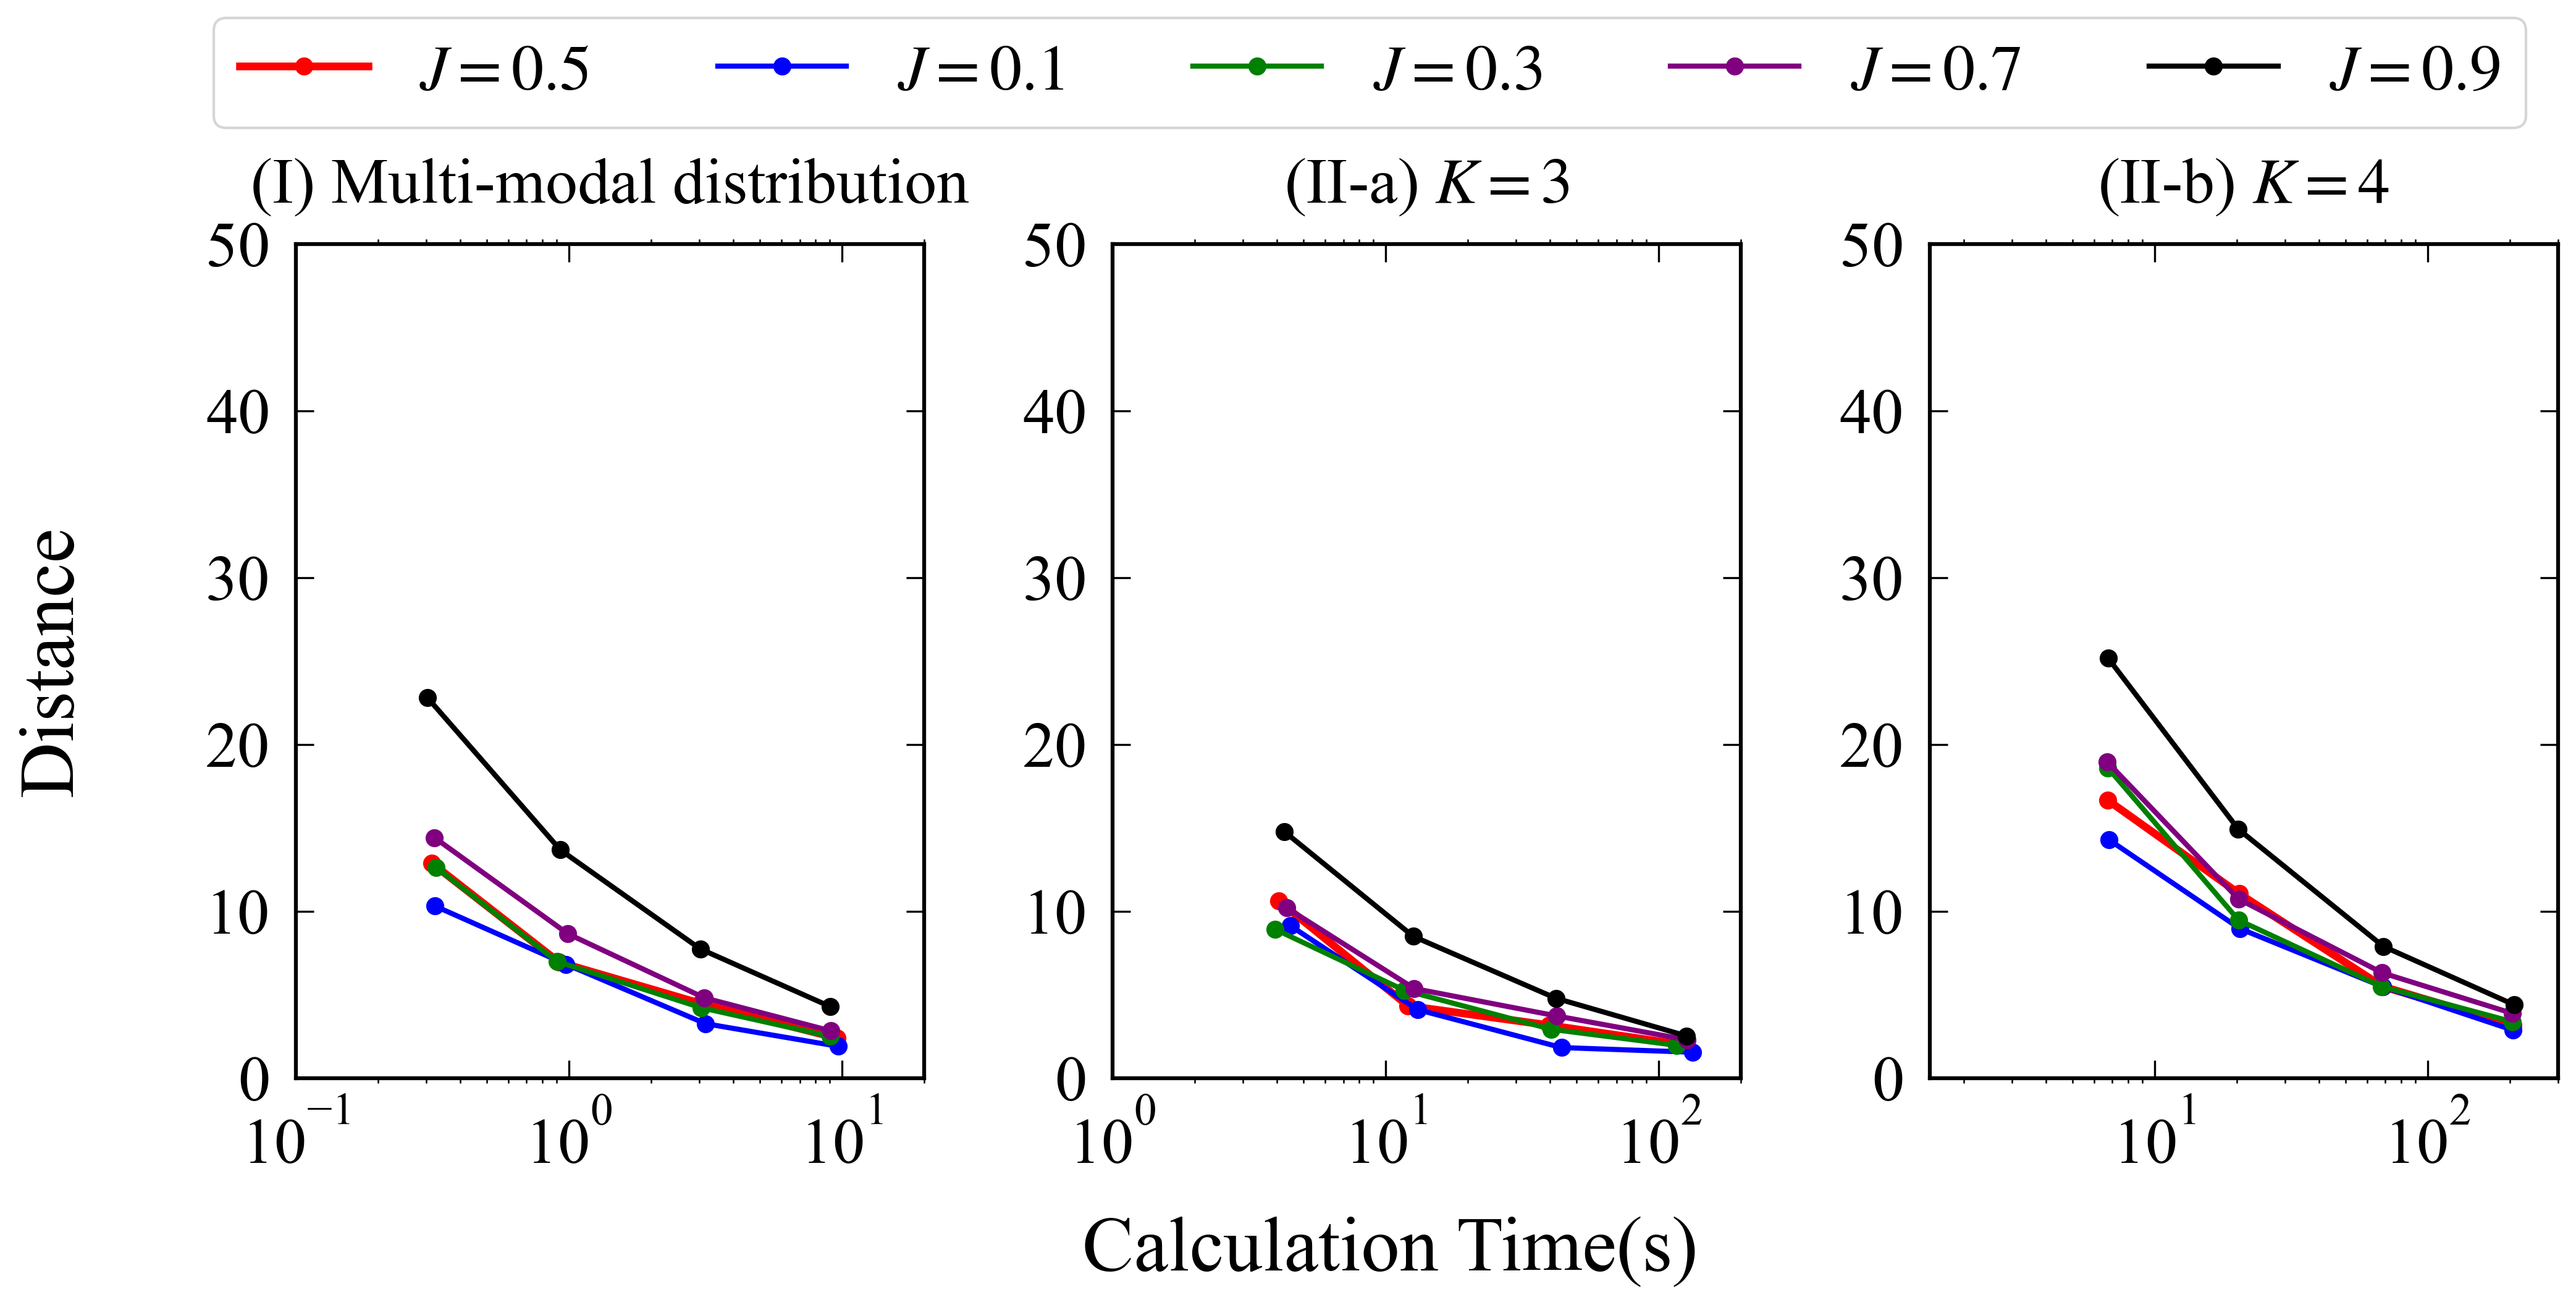

In [28]:
fig, axs = plt.subplots(1, 3, dpi=300, figsize=(15.75,5.625))
spines = 1.5
plt.rcParams['figure.subplot.bottom'] = 0.1
plt.rcParams['figure.subplot.top'] = 0.9
plt.rcParams['figure.subplot.right'] = 0.9
plt.rcParams['figure.subplot.left'] = 0.125
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 25
sample = 10000
Title_name = ["(I) Multi-modal distribution", "(II-a) $K=3$","(II-b) $K=4$"]
# Result_array_EMC_array = [Result_array_EMC_multimodal, Result_array_EMC_deconvolution, Result_array_EMC_deconvolution_K_4]
Result_array_SEMC_array = [Result_array_SEMC_multimodal, Result_array_SEMC_deconvolution, Result_array_SEMC_deconvolution_K_4]
# Time_array_EMC_array = [Time_array_EMC_multimodal, Time_array_EMC_deconvolution, Time_array_EMC_deconvolution_K_4]
Time_array_SEMC_array = [Time_array_SEMC_multimodal, Time_array_SEMC_deconvolution, Time_array_SEMC_deconvolution_K_4]
color_array = ["blue", "green", "purple", "black"]
text = ["$J = 0.1$","$J = 0.3$","$J = 0.7$","$J = 0.9$"]
for iter, ax in enumerate(axs):
    xmin = xmin_array[iter]
    xmax = xmax_array[iter]
    ymin = ymin
    ymax = ymax_array[iter]
    free_energy_array_SEMC = Result_array_SEMC_array[iter]
    Time_array_SEMC = Time_array_SEMC_array[iter]
    x = Time_array_SEMC[2]
    y = free_energy_array_SEMC[2]
    # ax.scatter(x,y,s=5,color = "red",alpha = 0.5,label = "SEMC")
    ax.plot(np.mean(x,axis = 1),np.mean(y,axis = 1),"-o",linewidth = 3,color = "red", label = "$J = 0.5$")
    ax.text(np.exp((np.log(xmin) + np.log(xmax))/2), ymax*1.05,Title_name[iter], ha='center')
    # ax.errorbar(np.mean(x,axis = 1),np.mean(y,axis = 1),yerr = np.std(y,axis = 1),color = "red",linewidth = 2, label = "Mean of SEMC with Error Bar", capsize=5)
    for i, label in enumerate(text):
        #0に黒い線を引く
        ax.axhline(0, color='black', linewidth=1, linestyle='--')
        ax.spines["top"].set_linewidth(spines)
        ax.spines["left"].set_linewidth(spines)
        ax.spines["bottom"].set_linewidth(spines)
        ax.spines["right"].set_linewidth(spines)
        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(direction = "in", length = 7)
        ax.set_xscale("log")
        ax.set_ylim([ymin,ymax])
        ax.set_xlim([xmin,xmax])
        if i < 2:
            x = Time_array_SEMC[i]
            y = free_energy_array_SEMC[i]
        else:
            x = Time_array_SEMC[i+1]
            y = free_energy_array_SEMC[i+1]
        # ax.scatter(x,y,s=5,alpha = 0.5,label = text[i] ,color = color_array[i])
        ax.plot(np.mean(x,axis = 1),np.mean(y,axis = 1),"-o",linewidth = 2, label = text[i], color = color_array[i])
        # ax.errorbar(np.mean(x,axis = 1),np.mean(y,axis = 1),yerr = np.std(y,axis = 1),color = "blue",linewidth = 2, label = "Mean of EMC with Error Bar", capsize=5)
        ax.tick_params(pad = 10)
    if iter == 2:
        ax.legend(loc='lower right', bbox_to_anchor=(1.0, 1.10), fontsize=25,ncol = 5)
            
    # axs[iter][0].text(xmin*0.1, ymax*1.8, Title_name[iter], ha='left', va='center')
fig.supylabel("Distance",x = 0.03, y = 0.5)
fig.supxlabel("Calculation Time(s)",x = 0.5, y = -0.1)
plt.subplots_adjust(wspace=0.3, hspace=1.0)
# plt.savefig("../../../MonteCarloPaper/日本語版/figure/SEMC_distribution", bbox_inches="tight")

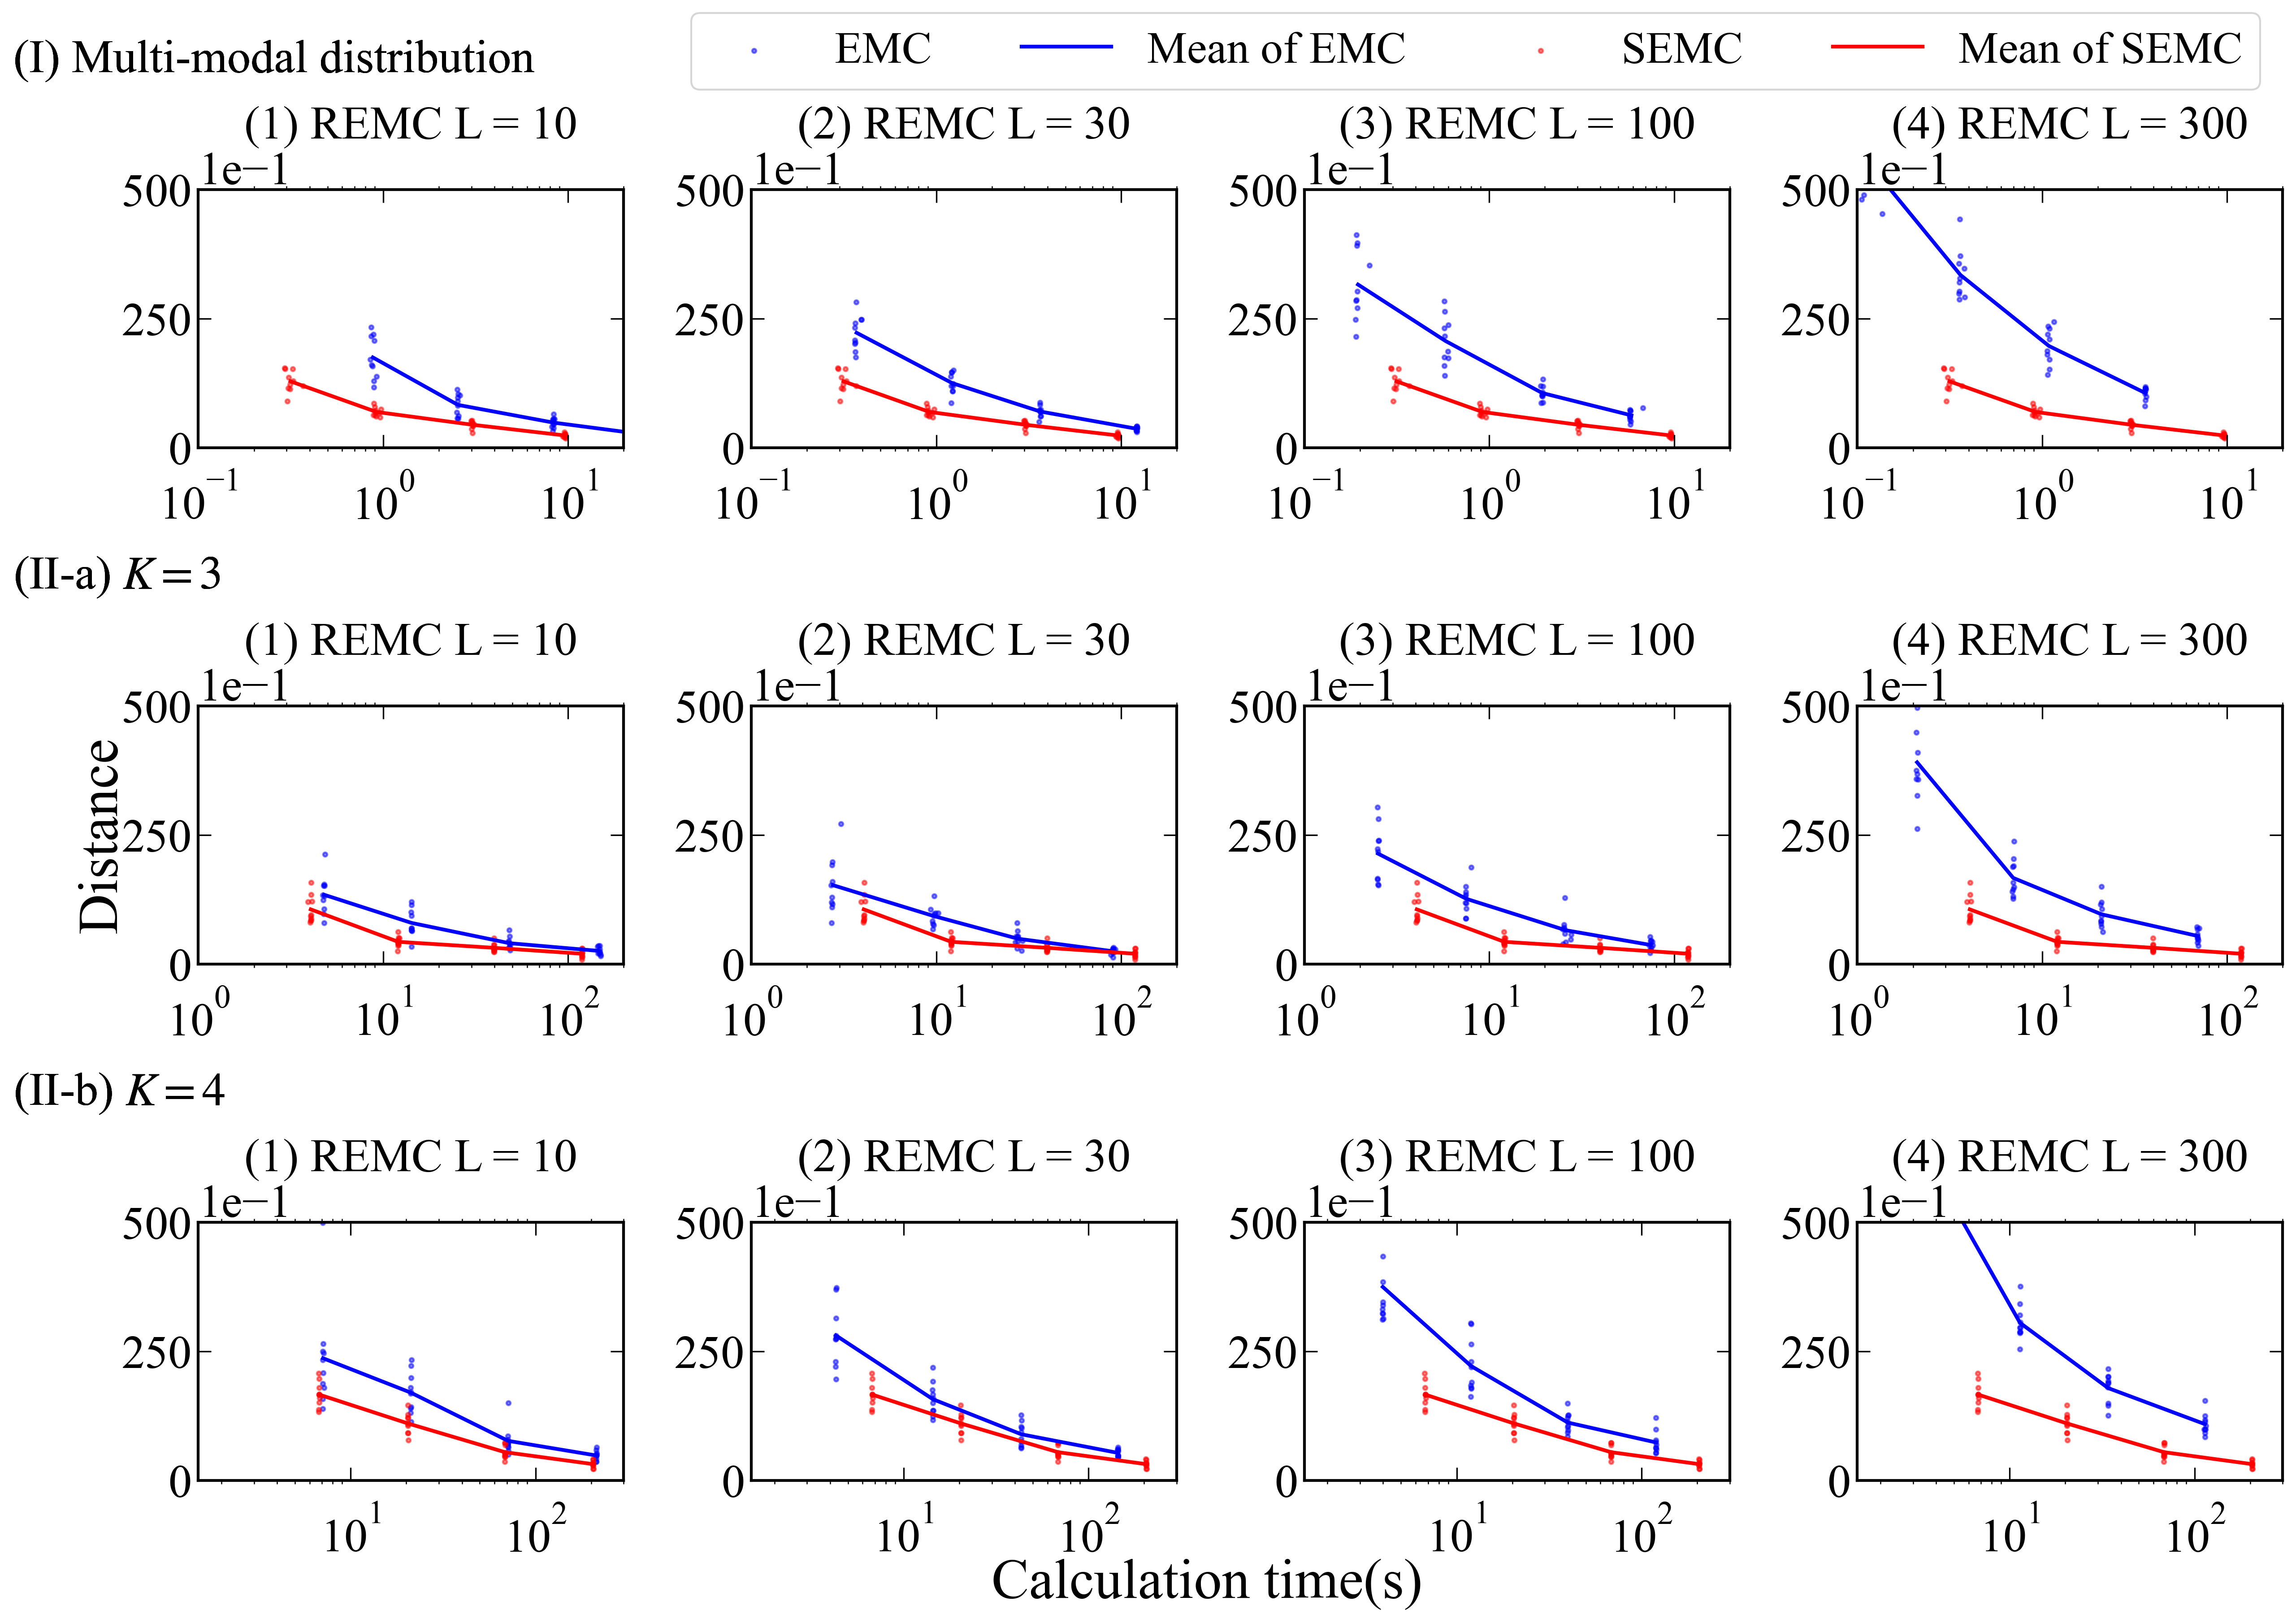

In [29]:
fig, axs = plt.subplots(3, 4, dpi=300, figsize=(20,12))
spines = 1.5
plt.rcParams['figure.subplot.bottom'] = 0.1
plt.rcParams['figure.subplot.top'] = 0.9
plt.rcParams['figure.subplot.right'] = 0.9
plt.rcParams['figure.subplot.left'] = 0.125
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 25
sample = 10000
Title_name = ["(I) Multi-modal distribution", "(II-a) $K=3$","(II-b) $K=4$"]
Result_array_EMC_array = [Result_array_EMC_multimodal, Result_array_EMC_deconvolution, Result_array_EMC_deconvolution_K_4]
Time_array_EMC_array = [Time_array_EMC_multimodal, Time_array_EMC_deconvolution, Time_array_EMC_deconvolution_K_4]
xmin_array = [0.1,1,1.5]
xmax_array = [2e1, 2e2, 3e2]
ymin = 0
ymax_array = [50, 50, 50]
text = ["(1) REMC L = 10","(2) REMC L = 30","(3) REMC L = 100","(4) REMC L = 300"]
for iter in range(len(axs)):
    Result_array_EMC = Result_array_EMC_array[iter]
    Result_array_SEMC = Result_array_SEMC_array[iter]
    Time_array_EMC = Time_array_EMC_array[iter]
    Time_array_SEMC = Time_array_SEMC_array[iter]
    ymax = ymax_array[iter]
    xmin = xmin_array[iter]
    xmax = xmax_array[iter]
    for i, ax in enumerate(axs[iter]):
        ax.ticklabel_format(style="sci", axis="y", scilimits=(-1,-1))
        ax.spines["top"].set_linewidth(spines)
        ax.spines["left"].set_linewidth(spines)
        ax.spines["bottom"].set_linewidth(spines)
        ax.spines["right"].set_linewidth(spines)
        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(direction = "in", length = 7)
        ax.set_xscale("log")
        ax.set_ylim([ymin,ymax])
        ax.set_xlim([xmin,xmax])
        x = Time_array_EMC[i]
        y = Result_array_EMC[i]
        ax.text(np.exp((np.log(xmin) + np.log(xmax))/2), ymax*1.2, text[i], ha='center')
        ax.scatter(x,y,s=5,color = "blue",alpha = 0.5,label = "EMC")
        ax.plot(np.mean(x,axis = 1),np.mean(y,axis = 1),color = "blue",linewidth = 2, label = "Mean of EMC")
        x = Time_array_SEMC[2]
        y = Result_array_SEMC[2]
        ax.scatter(x,y,s=5,color = "red",alpha = 0.5,label = "SEMC")
        ax.plot(np.mean(x,axis = 1),np.mean(y,axis = 1),color = "red",linewidth = 2, label = "Mean of SEMC")
        ax.tick_params(axis="x", pad=15)
        if iter == 0 and i == 3:
            #図の右上の外部に凡例を表示
            ax.legend(loc='lower right', bbox_to_anchor=(1.0, 1.3), fontsize=24,ncol = 4)
        axs[iter][0].text(xmin*0.1, ymax*1.5, Title_name[iter], ha='left', va='center')
plt.subplots_adjust(wspace=0.3, hspace=1.0)
fig.supylabel("Distance",x = 0.08, y = 0.5)
fig.supxlabel("Calculation time(s)",x = 0.5, y = 0.02)
# plt.savefig("../../../MonteCarloPaper/日本語版/figure/EMC_distribution", bbox_inches="tight")
plt.show()
    

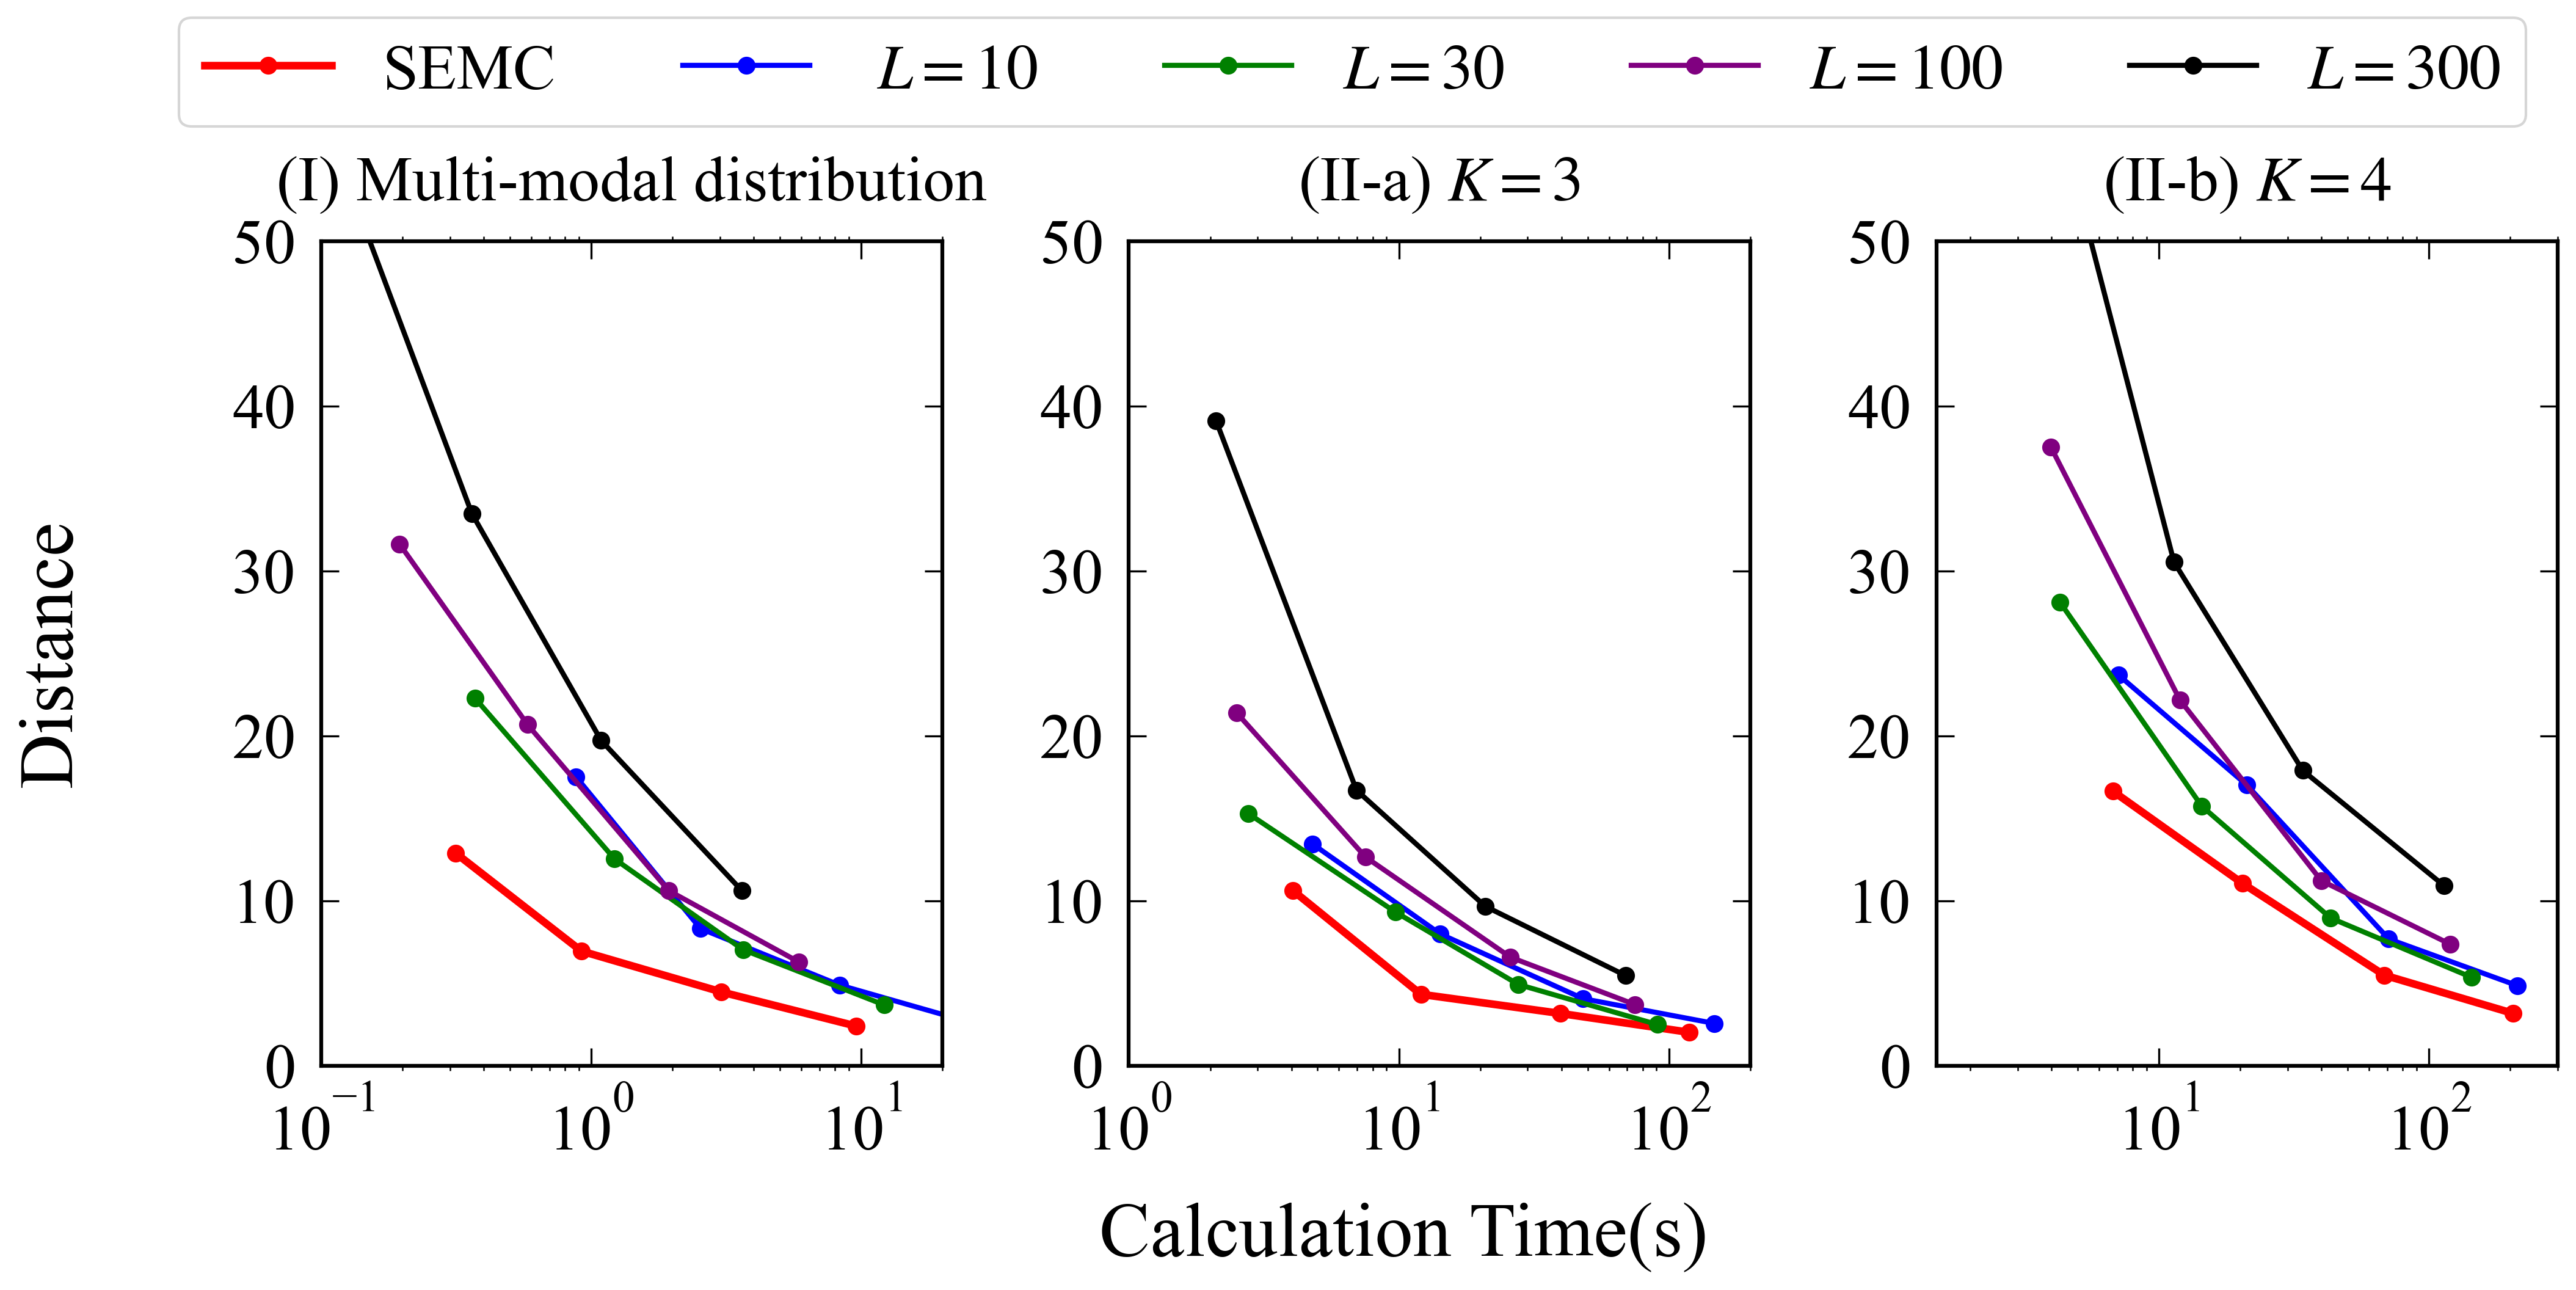

In [30]:
fig, axs = plt.subplots(1, 3, dpi=300, figsize=(15.75,5.625))
spines = 1.5
plt.rcParams['figure.subplot.bottom'] = 0.1
plt.rcParams['figure.subplot.top'] = 0.9
plt.rcParams['figure.subplot.right'] = 0.9
plt.rcParams['figure.subplot.left'] = 0.125
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 25
sample = 10000
Title_name = ["(I) Multi-modal distribution", "(II-a) $K=3$","(II-b) $K=4$"]
Result_array_EMC_array = [Result_array_EMC_multimodal, Result_array_EMC_deconvolution, Result_array_EMC_deconvolution_K_4]
Result_array_SEMC_array = [Result_array_SEMC_multimodal, Result_array_SEMC_deconvolution, Result_array_SEMC_deconvolution_K_4]
Time_array_EMC_array = [Time_array_EMC_multimodal, Time_array_EMC_deconvolution, Time_array_EMC_deconvolution_K_4]
Time_array_SEMC_array = [Time_array_SEMC_multimodal, Time_array_SEMC_deconvolution, Time_array_SEMC_deconvolution_K_4]
color_array = ["blue", "green", "purple", "black"]
text = [" $L = 10$","$L = 30$","$L = 100$","$L = 300$"]
for iter, ax in enumerate(axs):
    xmin = xmin_array[iter]
    xmax = xmax_array[iter]
    ymin = ymin
    ymax = ymax_array[iter]
    free_energy_array_SEMC = Result_array_SEMC_array[iter]
    Time_array_SEMC = Time_array_SEMC_array[iter]
    free_energy_array_EMC = Result_array_EMC_array[iter]
    Time_array_EMC = Time_array_EMC_array[iter]
    x = Time_array_SEMC[2]
    y = free_energy_array_SEMC[2]
    # ax.scatter(x,y,s=5,color = "red",alpha = 0.5,label = "SEMC")
    ax.plot(np.mean(x,axis = 1),np.mean(y,axis = 1),"-o",linewidth = 3,color = "red", label = "SEMC")
    ax.text(np.exp((np.log(xmin) + np.log(xmax))/2), ymax*1.05,Title_name[iter], ha='center')
    # ax.errorbar(np.mean(x,axis = 1),np.mean(y,axis = 1),yerr = np.std(y,axis = 1),color = "red",linewidth = 2, label = "Mean of SEMC with Error Bar", capsize=5)
    for i, label in enumerate(text):
        #0に黒い線を引く
        ax.axhline(0, color='black', linewidth=1, linestyle='--')
        ax.spines["top"].set_linewidth(spines)
        ax.spines["left"].set_linewidth(spines)
        ax.spines["bottom"].set_linewidth(spines)
        ax.spines["right"].set_linewidth(spines)
        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(direction = "in", length = 7)
        ax.set_xscale("log")
        ax.set_ylim([ymin,ymax])
        ax.set_xlim([xmin,xmax])
        x = Time_array_EMC[i]
        y = free_energy_array_EMC[i]
        # ax.scatter(x,y,s=5,alpha = 0.5,label = text[i] ,color = color_array[i])
        ax.plot(np.mean(x,axis = 1),np.mean(y,axis = 1),"-o",linewidth = 2, label = text[i], color = color_array[i])
        # ax.errorbar(np.mean(x,axis = 1),np.mean(y,axis = 1),yerr = np.std(y,axis = 1),color = "blue",linewidth = 2, label = "Mean of EMC with Error Bar", capsize=5)
        ax.tick_params(pad = 10)
    if iter == 2:
        ax.legend(loc='lower right', bbox_to_anchor=(1.0, 1.10), fontsize=25,ncol = 5)
            
    # axs[iter][0].text(xmin*0.1, ymax*1.8, Title_name[iter], ha='left', va='center')
fig.supylabel("Distance",x = 0.02, y = 0.5)
fig.supxlabel("Calculation Time(s)",x = 0.5, y = -0.1)
plt.subplots_adjust(wspace=0.3, hspace=1.0)
# plt.savefig("../../../MonteCarloPaper/日本語版/figure/EMC_distribution", bbox_inches="tight")

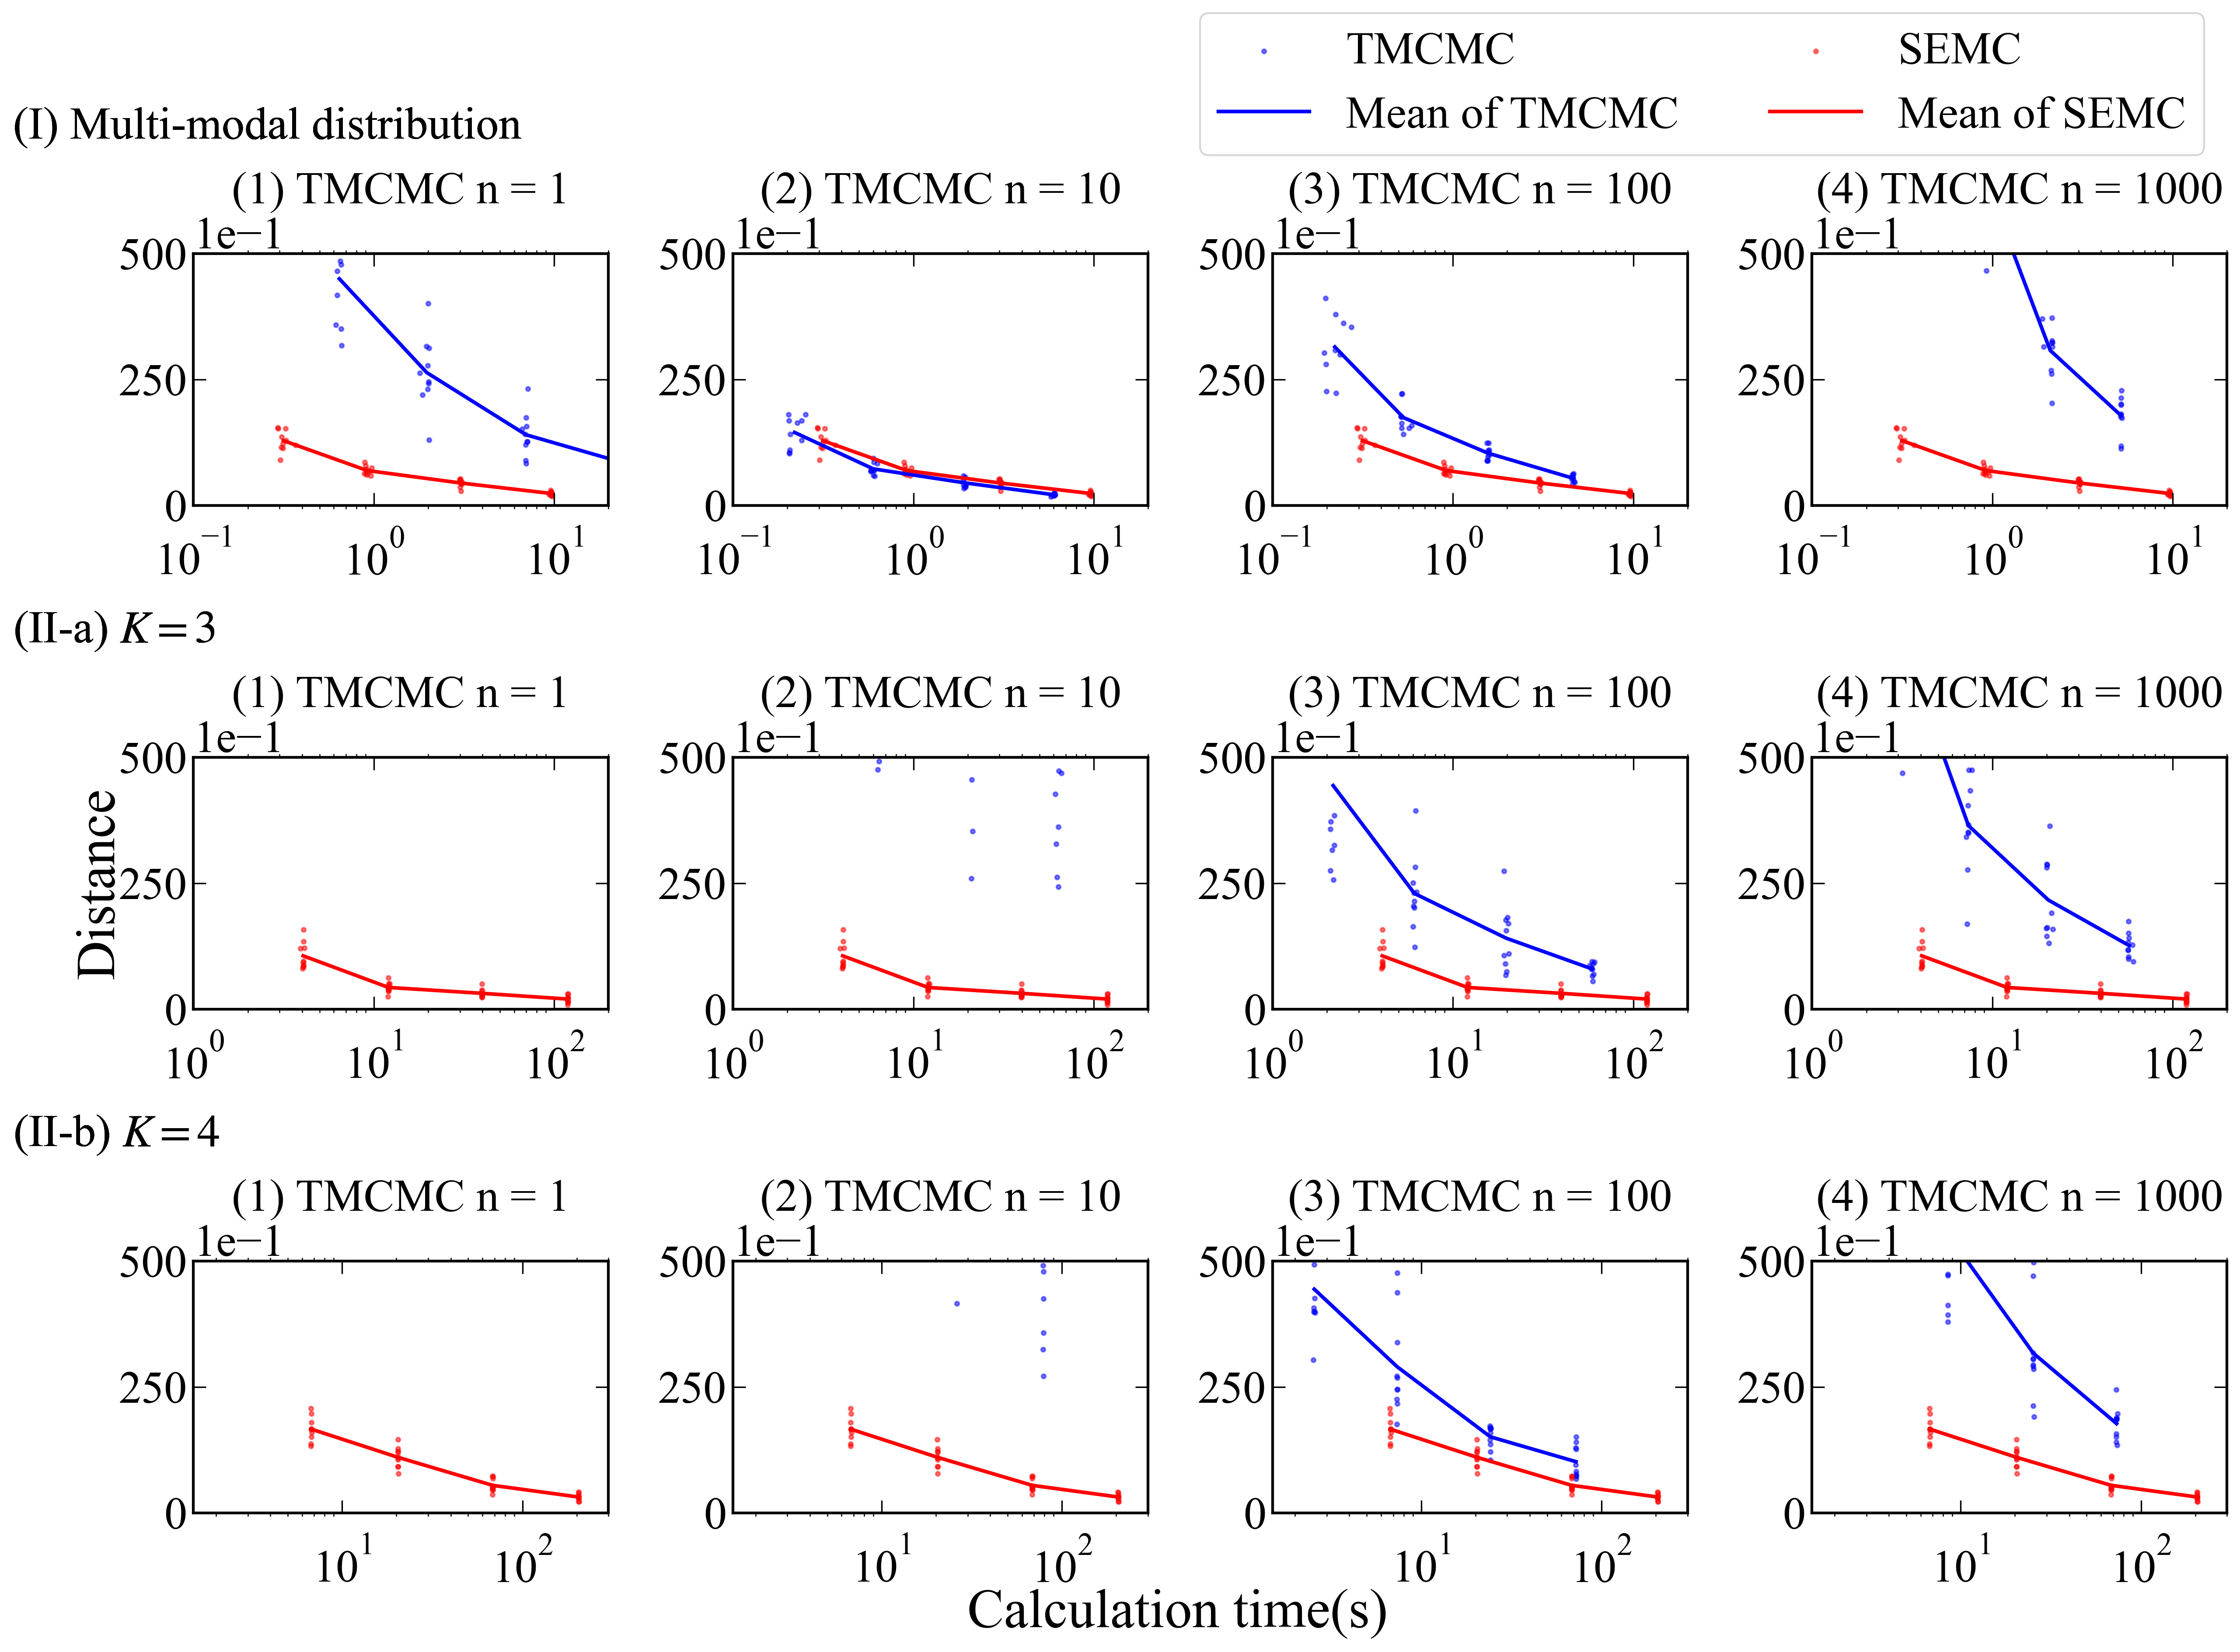

In [31]:
fig, axs = plt.subplots(3, 4, dpi=300, figsize=(20,12))
spines = 1.5
plt.rcParams['figure.subplot.bottom'] = 0.1
plt.rcParams['figure.subplot.top'] = 0.9
plt.rcParams['figure.subplot.right'] = 0.9
plt.rcParams['figure.subplot.left'] = 0.125
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 25
sample = 10000
Title_name = ["(I) Multi-modal distribution", "(II-a) $K=3$","(II-b) $K=4$"]
Result_array_TMCMC_array = [Result_array_TMCMC_multimodal, Result_array_TMCMC_deconvolution, Result_array_TMCMC_deconvolution_K_4]
Time_array_TMCMC_array = [Time_array_TMCMC_multimodal, Time_array_TMCMC_deconvolution, Time_array_TMCMC_deconvolution_K_4]
xmin_array = [0.1,1,1.5]
xmax_array = [2e1, 2e2, 3e2]
ymin = 0
ymax_array = [50, 50, 50]
text = ["(1) TMCMC n = 1","(2) TMCMC n = 10","(3) TMCMC n = 100","(4) TMCMC n = 1000"]
for iter in range(len(axs)):
    Result_array_TMCMC = Result_array_TMCMC_array[iter]
    Result_array_SEMC = Result_array_SEMC_array[iter]
    Time_array_TMCMC = Time_array_TMCMC_array[iter]
    Time_array_SEMC = Time_array_SEMC_array[iter]
    ymax = ymax_array[iter]
    xmin = xmin_array[iter]
    xmax = xmax_array[iter]
    for i, ax in enumerate(axs[iter]):
        ax.ticklabel_format(style="sci", axis="y", scilimits=(-1,-1))
        ax.spines["top"].set_linewidth(spines)
        ax.spines["left"].set_linewidth(spines)
        ax.spines["bottom"].set_linewidth(spines)
        ax.spines["right"].set_linewidth(spines)
        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(direction = "in", length = 7)
        ax.set_xscale("log")
        ax.set_ylim([ymin,ymax])
        ax.set_xlim([xmin,xmax])
        x = Time_array_TMCMC[i]
        y = Result_array_TMCMC[i]
        ax.text(np.exp((np.log(xmin) + np.log(xmax))/2), ymax*1.2, text[i], ha='center')
        ax.scatter(x,y,s=5,color = "blue",alpha = 0.5,label = "TMCMC")
        ax.plot(np.mean(x,axis = 1),np.mean(y,axis = 1),color = "blue",linewidth = 2, label = "Mean of TMCMC")
        x = Time_array_SEMC[2]
        y = Result_array_SEMC[2]
        ax.scatter(x,y,s=5,color = "red",alpha = 0.5,label = "SEMC")
        ax.plot(np.mean(x,axis = 1),np.mean(y,axis = 1),color = "red",linewidth = 2, label = "Mean of SEMC")
        ax.tick_params(axis="x", pad=15)
        if iter == 0 and i == 3:
            #図の右上の外部に凡例を表示
            ax.legend(loc='lower right', bbox_to_anchor=(1.0, 1.3), fontsize=25,ncol = 2)
        axs[iter][0].text(xmin*0.1, ymax*1.5, Title_name[iter], ha='left', va='center')
plt.subplots_adjust(wspace=0.3, hspace=1.0)
fig.supylabel("Distance",x = 0.08, y = 0.5)
fig.supxlabel("Calculation time(s)",x = 0.5, y = 0.02)
# plt.savefig("../../../MonteCarloPaper/日本語版/figure/TMCMC_distribution", bbox_inches="tight")
plt.show()
    

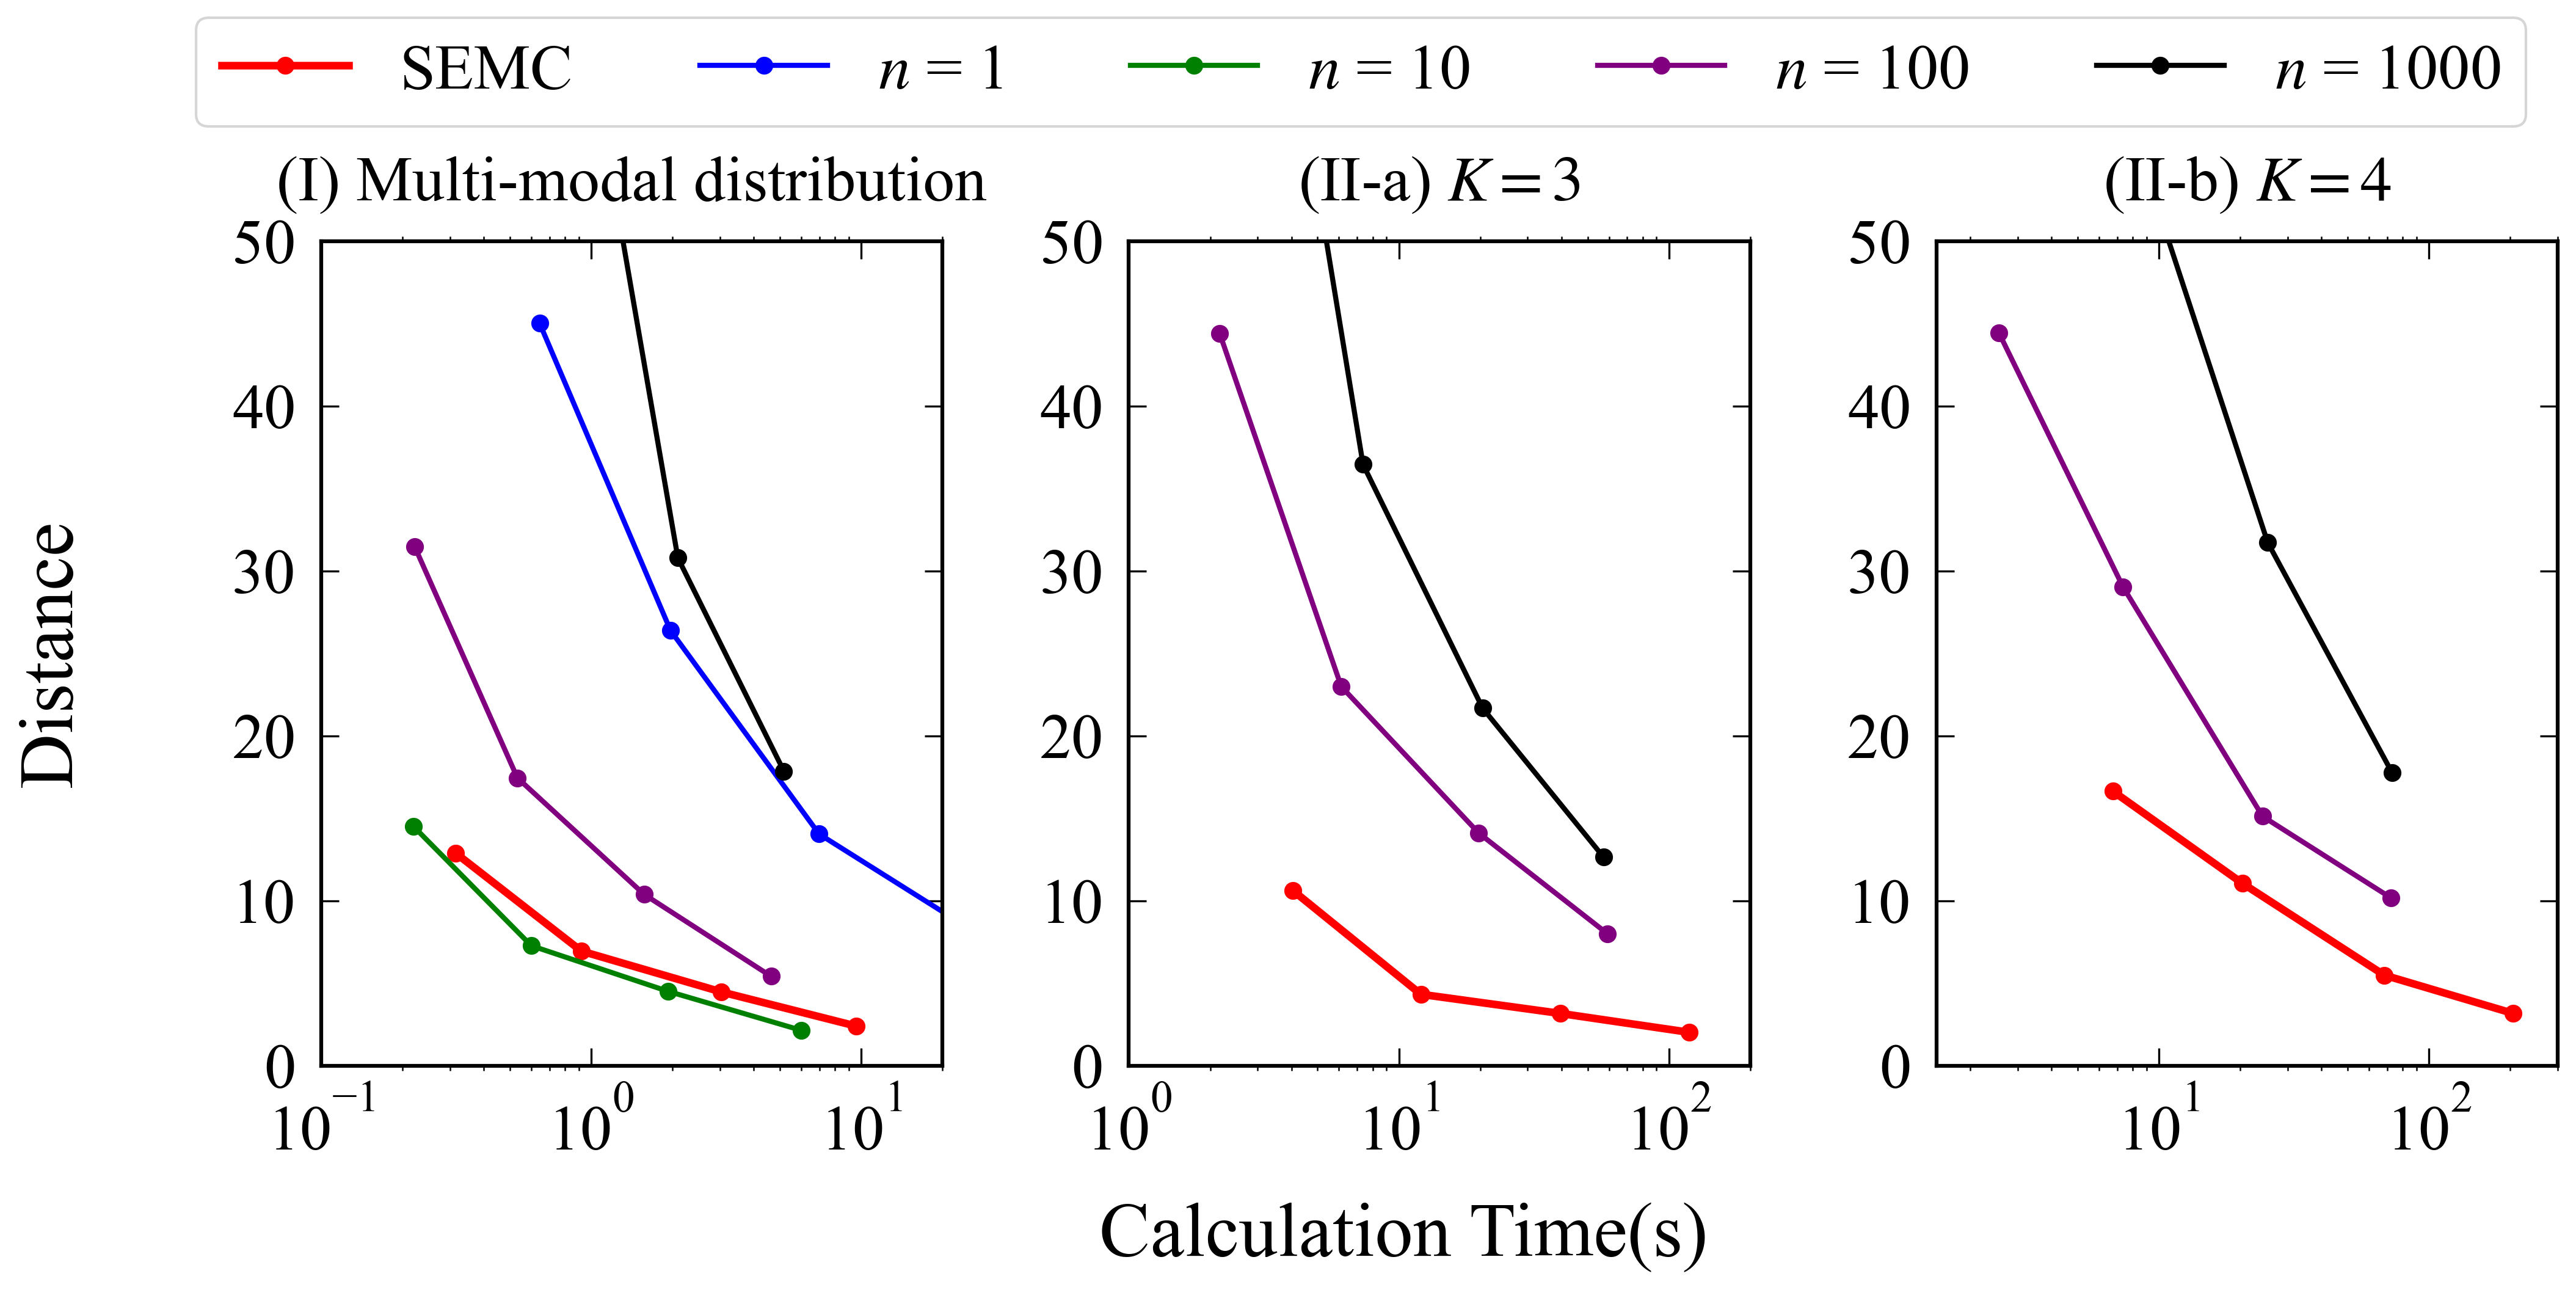

In [32]:
fig, axs = plt.subplots(1, 3, dpi=300, figsize=(15.75,5.625))
spines = 1.5
plt.rcParams['figure.subplot.bottom'] = 0.1
plt.rcParams['figure.subplot.top'] = 0.9
plt.rcParams['figure.subplot.right'] = 0.9
plt.rcParams['figure.subplot.left'] = 0.125
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 25
sample = 10000
Title_name = ["(I) Multi-modal distribution", "(II-a) $K=3$","(II-b) $K=4$"]
Result_array_SEMC_array = [Result_array_SEMC_multimodal, Result_array_SEMC_deconvolution, Result_array_SEMC_deconvolution_K_4]
Time_array_SEMC_array = [Time_array_SEMC_multimodal, Time_array_SEMC_deconvolution, Time_array_SEMC_deconvolution_K_4]
Result_array_TMCMC_array = [Result_array_TMCMC_multimodal, Result_array_TMCMC_deconvolution, Result_array_TMCMC_deconvolution_K_4]
Time_array_TMCMC_array = [Time_array_TMCMC_multimodal, Time_array_TMCMC_deconvolution, Time_array_TMCMC_deconvolution_K_4]
color_array = ["blue", "green", "purple", "black"]
text = [r"$n$ = 1",r"$n$ = 10",r"$n$ = 100",r"$n$ = 1000"]
for iter, ax in enumerate(axs):
    xmin = xmin_array[iter]
    xmax = xmax_array[iter]
    ymin = ymin
    ymax = ymax_array[iter]
    free_energy_array_SEMC = Result_array_SEMC_array[iter]
    Time_array_SEMC = Time_array_SEMC_array[iter]
    free_energy_array_TMCMC = Result_array_TMCMC_array[iter]
    Time_array_TMCMC = Time_array_TMCMC_array[iter]
    x = Time_array_SEMC[2]
    y = free_energy_array_SEMC[2]
    # ax.scatter(x,y,s=5,color = "red",alpha = 0.5,label = "SEMC")
    ax.plot(np.mean(x,axis = 1),np.mean(y,axis = 1),"-o",linewidth = 3,color = "red", label = "SEMC")
    ax.text(np.exp((np.log(xmin) + np.log(xmax))/2), ymax*1.05,Title_name[iter], ha='center')
    # ax.errorbar(np.mean(x,axis = 1),np.mean(y,axis = 1),yerr = np.std(y,axis = 1),color = "red",linewidth = 2, label = "Mean of SEMC with Error Bar", capsize=5)
    for i, label in enumerate(text):
        #0に黒い線を引く
        ax.axhline(0, color='black', linewidth=1, linestyle='--')
        ax.spines["top"].set_linewidth(spines)
        ax.spines["left"].set_linewidth(spines)
        ax.spines["bottom"].set_linewidth(spines)
        ax.spines["right"].set_linewidth(spines)
        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(direction = "in", length = 7)
        ax.set_xscale("log")
        ax.set_ylim([ymin,ymax])
        ax.set_xlim([xmin,xmax])
        x = Time_array_TMCMC[i]
        y = free_energy_array_TMCMC[i]
        # ax.scatter(x,y,s=5,alpha = 0.5,label = text[i] ,color = color_array[i])
        ax.plot(np.mean(x,axis = 1),np.mean(y,axis = 1),"-o",linewidth = 2, label = text[i], color = color_array[i])
        # ax.errorbar(np.mean(x,axis = 1),np.mean(y,axis = 1),yerr = np.std(y,axis = 1),color = "blue",linewidth = 2, label = "Mean of EMC with Error Bar", capsize=5)
        ax.tick_params(pad = 10)
    if iter == 2:
        ax.legend(loc='lower right', bbox_to_anchor=(1.0, 1.10), fontsize=25,ncol = 5)
            
    # axs[iter][0].text(xmin*0.1, ymax*1.8, Title_name[iter], ha='left', va='center')
fig.supylabel("Distance",x = 0.02, y = 0.5)
fig.supxlabel("Calculation Time(s)",x = 0.5, y = -0.1)
plt.subplots_adjust(wspace=0.3, hspace=1.0)
# plt.savefig("../../../MonteCarloPaper/日本語版/figure/TMCMC_distribution", bbox_inches="tight")

NameError: name 'Result_array_SEMC_array' is not defined

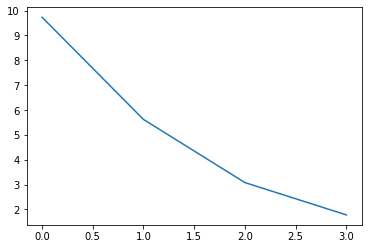

In [8]:
hist_prob = hist/np.sum(hist)
var = np.sum(hist_prob*(1-hist_prob))
theory = np.zeros(4)
sample_array = [10000,30000,100000,300000]
for i in range(4):
    theory[i] = np.sqrt(var)*1000/np.sqrt(sample_array[i])
plt.plot(theory)
plt.plot(np.mean(Result_array_SEMC_array[0][2],axis = 1))

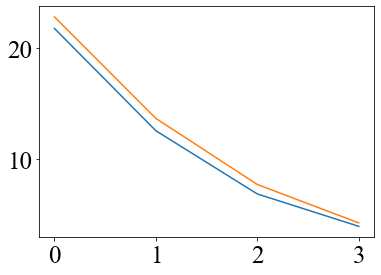

In [50]:
hist_prob = hist/np.sum(hist)
var = np.sum(hist_prob*(1-hist_prob))
theory = np.zeros(4)
sample_array = [2000,6000,20000,60000]
for i in range(4):
    theory[i] = np.sqrt(var)*1000/np.sqrt(sample_array[i])
plt.plot(theory)
plt.plot(np.mean(Result_array_SEMC_array[0][4],axis = 1))

In [ ]:
hist_prob = baseline_hists/np.sum(baseline_hists, axis = 1)
var = np.sum(hist_prob*(1-hist_prob))
theory = np.zeros(4)
sample_array = [10000,30000,100000,300000]
for i in range(4):
    theory[i] = np.sqrt(var)*1000/np.sqrt(sample_array[i])
plt.plot(theory)
plt.plot(np.mean(Result_array_SEMC_array[0][2],axis = 1))

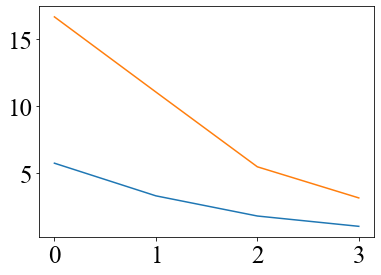

In [62]:
hist_prob = baseline_hists/np.sum(baseline_hists[0])
theory = np.zeros(4)
sample_array = [10000,30000,100000,300000]
for i in range(4):
    for j in range(3):
        var = np.sum(hist_prob[j]*(1-hist_prob[j]))
        theory[i] += np.sqrt(var)*200/np.sqrt(sample_array[i])
    theory[i] = theory[i]
plt.plot(theory)
plt.plot(np.mean(Result_array_SEMC_array[2][2],axis = 1))

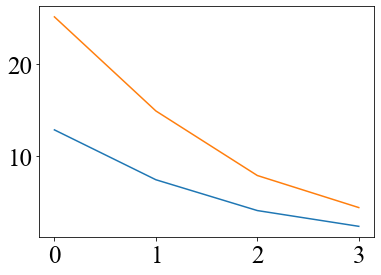

In [63]:
hist_prob = baseline_hists/np.sum(baseline_hists[0])
theory = np.zeros(4)
sample_array = [2000,6000,20000,60000]
for i in range(4):
    for j in range(3):
        var = np.sum(hist_prob[j]*(1-hist_prob[j]))
        theory[i] += np.sqrt(var)*200/np.sqrt(sample_array[i])
    theory[i] = theory[i]
plt.plot(theory)
plt.plot(np.mean(Result_array_SEMC_array[2][4],axis = 1))